# Introduction and Background

One of the most pressing issues that we have in the United States today is poverty. While a common idea is that it involves a person or community lacking the necessary finances, resources, or even shelter. Even so, there is a far-reaching meaning when we closely look at what factors are associated with poverty. This led us to our next interest on how one's income is affected. Thus, in extension to our last project, we will be studying what attributes such as Race, Sex, Age, etc. that may affect an individual's income. We aim to apply the statistical techniques and tools that we have learned from this semester to build predictive models and discover what predictors are significant to this study. Additionally, we were interested in looking at Minnesota and Colorado individually and see how our prediction models compare at the end of the project.

For the purpose of this study, an individual or personal income is reported based on the previous year of the person's wages, salaries, and other type of money income received from an employer.

# Importing Dataset

The data was extracted from the IPUMS website, a public database that provides numerous samples from around the world, where it includes the American Community Survey (ACS) conducted by the U.S Census Bureau. This online database provides us the option to select attributes that cater towards our study in regards to predicting an individual’s income. This dataset will be the 2018 ACS (5-year estimate) and is observational since it has been collected to measure or survey an individual's income levels, demographics, employment rates, etc. for each state. The variables in the dataset includes:

* **YEAR**: Year when the ACS was conducted
* **STATEFIP**: State FIPS Code
* **FAMSIZE**: Number of family members in household **[continuous]**
* **SEX**: Male or Female **[categorical]**
* **AGE**: Age in years  **[continous]**
* **MARRNO**: Number of times the person was married **[continous]**
* **RACE**: Race (original version) **[categorical]**
* **YRSUSA1**: 	Years lived in the US **[continous]**
* **EDUC**: Educational attainment **[categorical]**	
* **CLASSWKR**: Class of worker	 **[continous]**
* **UHRSWORK**: Usual hours worked per week **[continous]**
* **INCWAGE**: Individual's income and salary wage **[continous]**
* **POVERTY**: Poverty Status **[categorical]**
* **OCCSCORE**: Occupational Score **[continous]**
* **DIFFSENS**: Vision or hearing difficulty **[categorical]**

In [77]:
library(dplyr)
library(ggplot2)
library(plyr)
library(zoo)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(tidyverse)
library(leaps)
library(car)
library(corrplot)

acs_2018 = read.table("usa_00007.csv", sep = ",", header = TRUE)
acs_2018_1 = read.table("cleaned_acs_2018.csv", sep = ",", header = TRUE)
head(acs_2018)

summary(acs_2018)
# Filter state to Minnesota
minn = filter(acs_2018, STATEFIP == '27')
minn1 = filter(acs_2018_1, STATEFIP == 'Minnesota')
minn = data.frame(minn)

#Filter state to Colorado
CO = filter(acs_2018, STATEFIP == "8")
CO_Cleaned = filter(acs_2018_1, STATEFIP == "Colorado")

YEAR STATEFIP FAMSIZE SEX AGE MARRNO RACE RACED YRSUSA1 EDUC EDUCD CLASSWKR
1 2018 8        1       1   22  0      1    100   0        6    63   2       
2 2018 8        5       2   58  1      1    100   0        6    63   2       
3 2018 8        5       1   58  1      1    100   0       11   115   1       
4 2018 8        5       2   34  1      1    100   0       11   114   2       
5 2018 8        5       1   39  1      1    100   0       11   114   2       
6 2018 8        2       2   60  1      1    100   0       10   101   2       
  CLASSWKRD UHRSWORK INCWAGE POVERTY OCCSCORE DIFFSENS
1 25        70       31852     0     20       2       
2 22        25       31852   501     25       1       
3 13        20           0   501     62       1       
4 23        40       53086   501     42       1       
5 23        40       44593   501     27       1       
6 22        45       47778   501     42       1

      YEAR         STATEFIP        FAMSIZE            SEX       
 Min.   :2018   Min.   : 8.00   Min.   : 1.000   Min.   :1.000  
 1st Qu.:2018   1st Qu.: 8.00   1st Qu.: 2.000   1st Qu.:1.000  
 Median :2018   Median :27.00   Median : 2.000   Median :2.000  
 Mean   :2018   Mean   :17.52   Mean   : 2.573   Mean   :1.504  
 3rd Qu.:2018   3rd Qu.:27.00   3rd Qu.: 3.000   3rd Qu.:2.000  
 Max.   :2018   Max.   :27.00   Max.   :17.000   Max.   :2.000  
      AGE            MARRNO            RACE           RACED      
 Min.   :18.00   Min.   :0.0000   Min.   :1.000   Min.   :100.0  
 1st Qu.:34.00   1st Qu.:1.0000   1st Qu.:1.000   1st Qu.:100.0  
 Median :50.00   Median :1.0000   Median :1.000   Median :100.0  
 Mean   :49.63   Mean   :0.9672   Mean   :1.408   Mean   :142.2  
 3rd Qu.:63.00   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:100.0  
 Max.   :95.00   Max.   :3.0000   Max.   :9.000   Max.   :990.0  
    YRSUSA1           EDUC            EDUCD           CLASSWKR   
 Min.   : 0.00   

Here, we would like to build predictive models and formulate a hypothesis in regards to the potential predictors that may affect an individual income or wage (**INCWAGE**) for the state of Colorado and Minnesota. Additionally, IPUMS provides a Data Documentation Initiative (DDI) file, in short, this is to help us relabel some values that were assigned to decriptive labels (i.e, the variable **SEX**, Male and Female code values are 1 and 2 respectively) and provide us with details regarding the variables that are included in the dataset.

# Method and Results #

After importing the dataset, a large portion of the project was spent cleaning and manipulationg the dataset. The process consited of merging datasets, fixing structural errors, removing irrelevant data, and amending variables in order to ensure the dataset are consistent with each other. The unfiltered dataset had raw numerical values that corresponded with a category, while the cleaned dataset had category descriptive values. However, due to complications, Anaconda environment did not support the **ipumsr** package. To work around this issue, we utilized R Studio and read_ipums_ddi() function to relabel the values within the original dataset to a more detailed label.

To polish our datasets, we worked with both the unfiltered and cleaned the dataset to impute correct values and corresponding descriptions. We noticed that there were variables had values that represented NA's and to many descriptive elements for what we needed. The mismatched values were then removed by replacing the zero's with NA's so that the linear model do not interpret these zero values as actual input. We reduced the amount of description for the Race and Education variables due to having a subtantial amount of redundant factors.

In [78]:
# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
minn$MARST = minn1$MARST
minn$CLASSWKR = minn1$CLASSWKR
minn$DIFFSENS = minn1$DIFFSENS
minn$SEX = minn1$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
minn$RACE[minn$RACE == 1] = "White"
minn$RACE[minn$RACE == 2] = "Black/African American"
minn$RACE[minn$RACE == 3] = "American Indian or Alaska Native"
minn$RACE[minn$RACE == 4] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 5] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 6] = "Asian American or Pacific Islander"
minn$RACE[minn$RACE == 7] = "Other Race"
minn$RACE[minn$RACE == 8] = "Other Race"
minn$RACE[minn$RACE == 9] = "Other Race"

# Grouping Education Levels
minn$EDUC[minn$EDUC == 0] = "High School or Less"
minn$EDUC[minn$EDUC == 1] = "High School or Less"
minn$EDUC[minn$EDUC == 2] = "High School or Less"
minn$EDUC[minn$EDUC == 3] = "High School or Less"
minn$EDUC[minn$EDUC == 4] = "High School or Less"
minn$EDUC[minn$EDUC == 5] = "High School or Less"
minn$EDUC[minn$EDUC == 6] = "High School or Less"
minn$EDUC[minn$EDUC == 7] = "College or More"
minn$EDUC[minn$EDUC == 8] = "College or More"
minn$EDUC[minn$EDUC == 9] = "College or More"
minn$EDUC[minn$EDUC == 10] = "College or More"
minn$EDUC[minn$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used in R Studio changed the NA values to 0
minn$YRSUSA1[minn$YRSUSA1 == 0] = NA

# Utilized R Studio in order to use ipumsr package to relabel values to the actual labels
# i.e, SEX values 1 will be changed to Male
CO$MARST = CO_Cleaned$MARST
CO$CLASSWKR = CO_Cleaned$CLASSWKR
CO$DIFFSENS = CO_Cleaned$DIFFSENS
CO$SEX = CO_Cleaned$SEX

# Grouping Chinese, Japanese, Other Asian, and Pacific Islander to Asian American
CO$RACE[CO$RACE == 1] = "White"
CO$RACE[CO$RACE == 2] = "Black/African American"
CO$RACE[CO$RACE == 3] = "American Indian or Alaska Native"
CO$RACE[CO$RACE == 4] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 5] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 6] = "Asian American or Pacific Islander"
CO$RACE[CO$RACE == 7] = "Other Race"
CO$RACE[CO$RACE == 8] = "Other Race"
CO$RACE[CO$RACE == 9] = "Other Race"

# Grouping Education Levels
CO$EDUC[CO$EDUC == 0] = "High School or Less"
CO$EDUC[CO$EDUC == 1] = "High School or Less"
CO$EDUC[CO$EDUC == 2] = "High School or Less"
CO$EDUC[CO$EDUC == 3] = "High School or Less"
CO$EDUC[CO$EDUC == 4] = "High School or Less"
CO$EDUC[CO$EDUC == 5] = "High School or Less"
CO$EDUC[CO$EDUC == 6] = "High School or Less"
CO$EDUC[CO$EDUC == 7] = "College or More"
CO$EDUC[CO$EDUC == 8] = "College or More"
CO$EDUC[CO$EDUC == 9] = "College or More"
CO$EDUC[CO$EDUC == 10] = "College or More"
CO$EDUC[CO$EDUC == 11] = "College or More"

# Changing 0 to NA, this is because of the IPUMS package used 
# in R Studio changed the NA values to 0
CO$YRSUSA1[CO$YRSUSA1 == 0] = NA

# FAMSIZE, AGE, MARRNO, YRSUSA1, UHRSWORK, INCWAGE, OCCSCORE are continuous

In [79]:
mn = select(minn, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
co = select(CO, -c(YEAR, STATEFIP, RACED, CLASSWKRD, EDUCD, POVERTY))
head(mn)

FAMSIZE SEX    AGE MARRNO RACE  YRSUSA1 EDUC                CLASSWKR       
1 3       Male   37  1      White NA      College or More     Works for wages
2 3       Female 37  1      White NA      College or More     Works for wages
3 2       Female 25  0      White NA      College or More     Works for wages
4 5       Female 43  1      White NA      College or More     Works for wages
5 5       Male   42  1      White NA      College or More     Works for wages
6 5       Female 18  0      White NA      High School or Less N/A            
  UHRSWORK INCWAGE OCCSCORE DIFFSENS                       
1 40        39815  42       No vision or hearing difficulty
2 50       106173  42       No vision or hearing difficulty
3 36        16988  16       No vision or hearing difficulty
4 32        45654  25       No vision or hearing difficulty
5 50        63704  30       No vision or hearing difficulty
6  0            0   0       No vision or hearing difficulty

Following the data cleaning process, we performed simple graphical summeries of the dataset to explore each variables, where we color coordinated the states with blue and green to Minnesota and Colorado respectively. This is to help distinguish between the plots, to remove any confusions, we will be keeping the colors consistent with the corresponding states. Furthermore, these graphical summaries is to help identify any new noticeable irregularies of the dataset. Note that **OCCSCORE** has an unusual amount of $0$ values, this was a similar irregularity that we found during the cleaning process. Thus, we replaced these values to NA to help with our analysis process later.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 203025 rows containing non-finite values (stat_count).”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: b

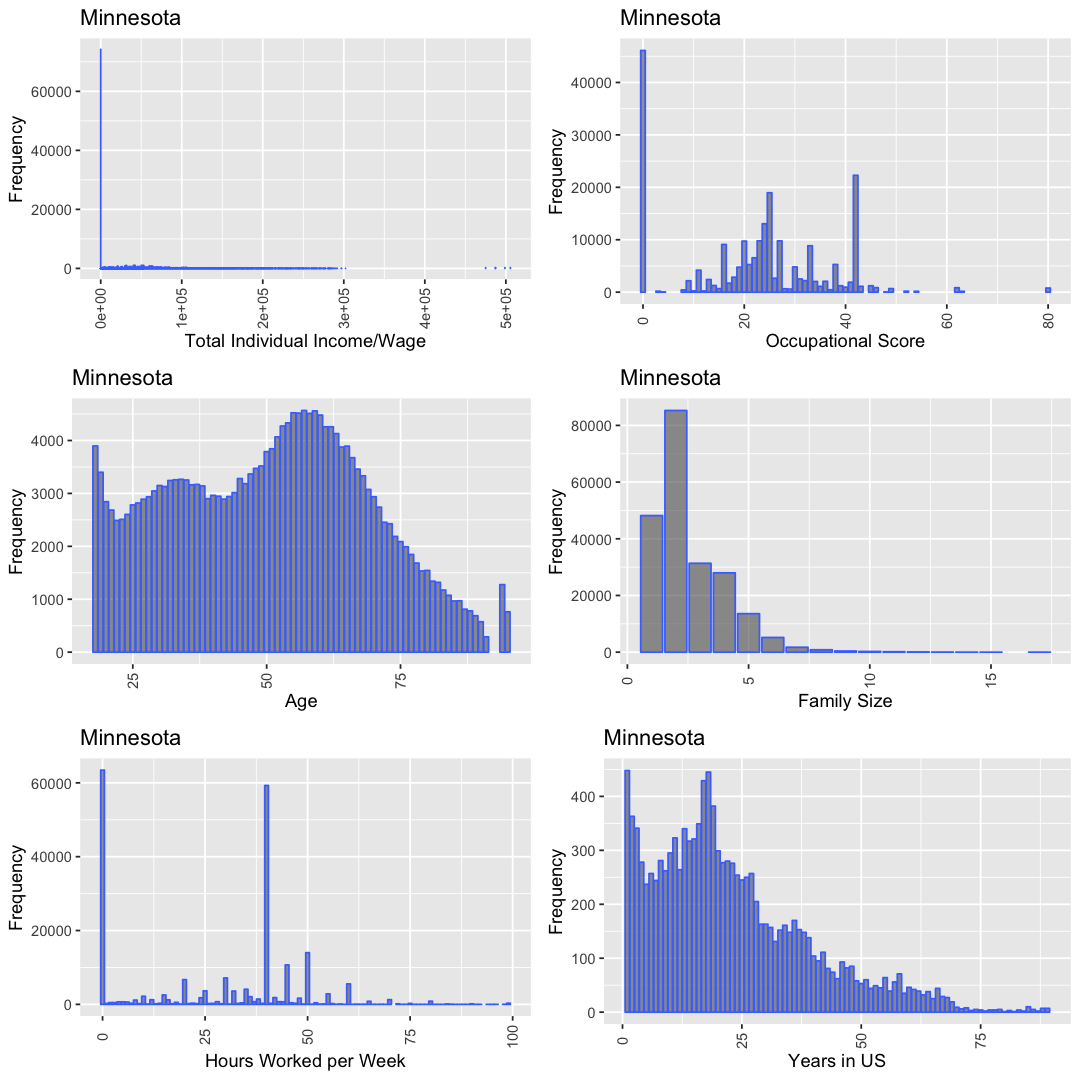

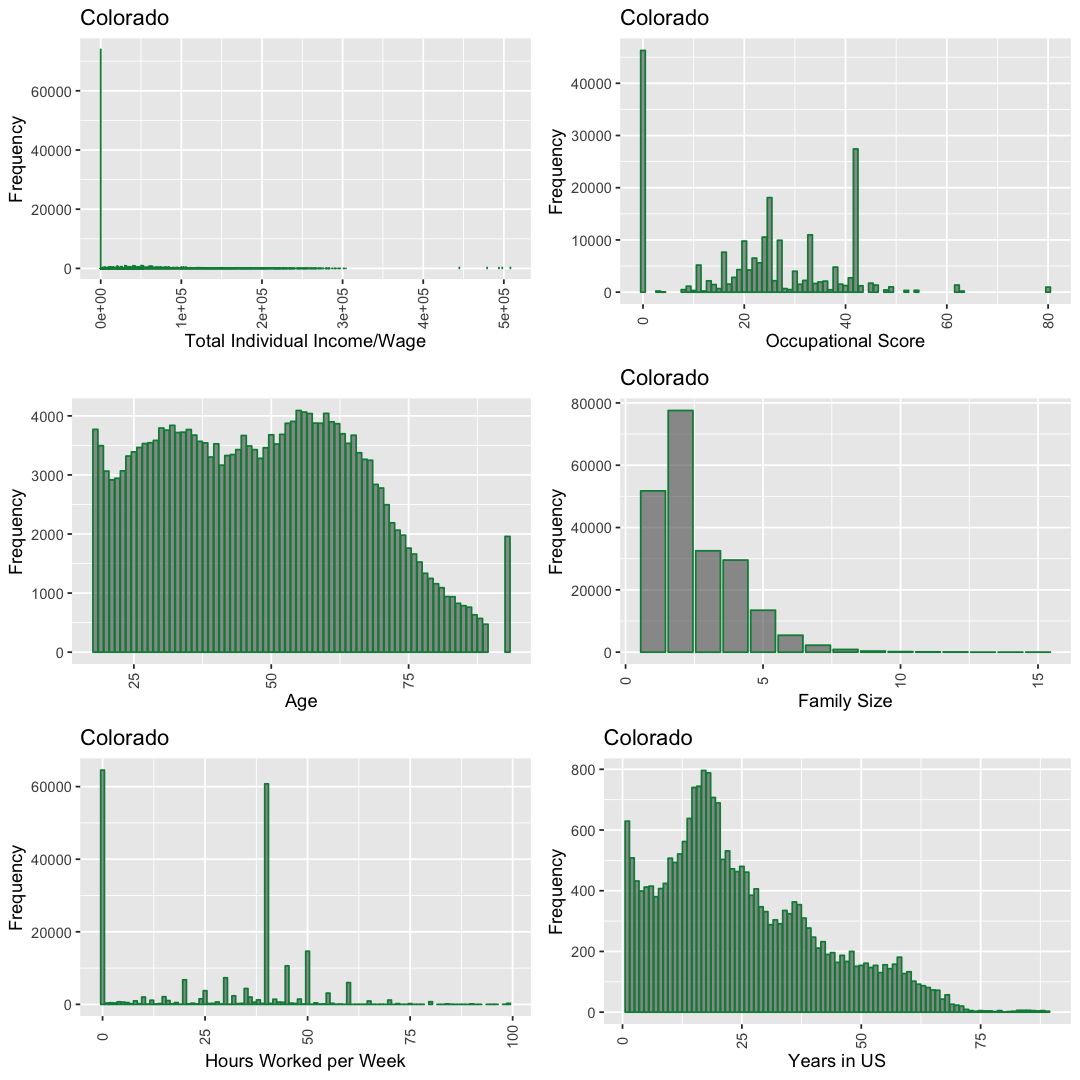

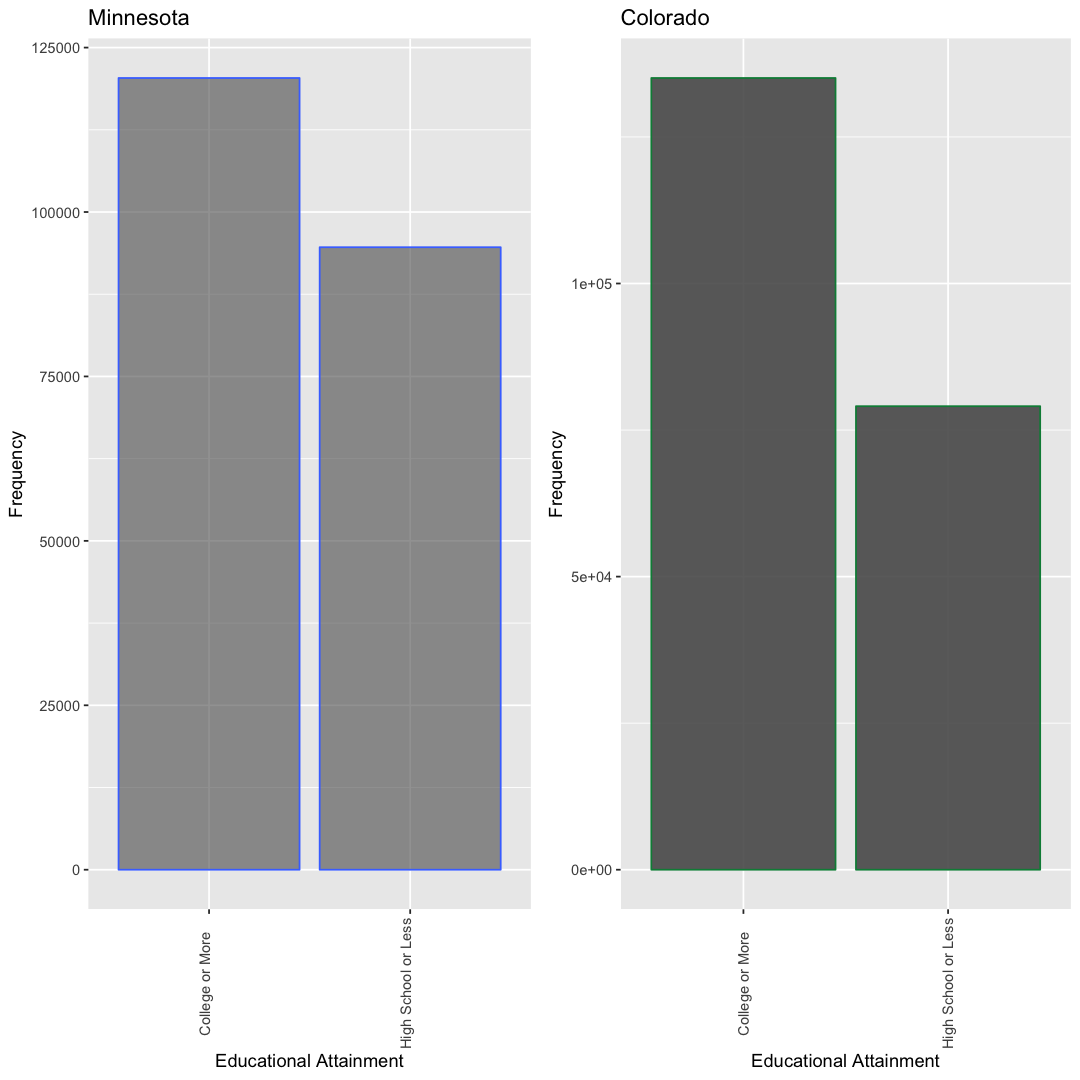

In [30]:
# Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(mn, aes(x = mn$AGE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

famsize_hist <- ggplot(mn, aes(x = mn$FAMSIZE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

hours_hist <- ggplot(mn, aes(x = mn$UHRSWORK)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

edu_hist_m <- ggplot(mn, aes(x = mn$EDUC)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.1)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

inc_hist <- ggplot(mn, aes(x = mn$INCWAGE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

occ_hist <- ggplot(mn, aes(x = mn$OCCSCORE)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

years_hist <- ggplot(mn, aes(x = mn$YRSUSA1)) +
    geom_histogram(color="royalblue1", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + ggtitle("Minnesota") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")
grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, 
             hours_hist, years_hist, nrow=3)

# Colorado Exploratory Data Analysis

# Histograms for numeric values
age_hist <- ggplot(co, aes(x = co$AGE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Age") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + ggtitle("") + theme(legend.position = "none")

famsize_hist <- ggplot(co, aes(x = co$FAMSIZE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Family Size") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

hours_hist <- ggplot(co, aes(x = co$UHRSWORK)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Hours Worked per Week") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

edu_hist_c <- ggplot(co, aes(x = co$EDUC)) +
    geom_histogram(color="springgreen4", alpha=0.9, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Educational Attainment") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

inc_hist <- ggplot(co, aes(x = co$INCWAGE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Total Individual Income/Wage") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

occ_hist <- ggplot(co, aes(x = co$OCCSCORE)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Occupational Score") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

years_hist <- ggplot(co, aes(x = co$YRSUSA1)) +
    geom_histogram(color="springgreen4", alpha=0.6, stat = 'count') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + 
    scale_fill_manual(values=c("#69b3a2")) + xlab("Years in US") + ggtitle("Colorado") +
    ylab("Frequency") + labs(fill = "") + theme(legend.position = "none")

grid.arrange(inc_hist, occ_hist, age_hist, famsize_hist, hours_hist, years_hist,
             nrow=3)

grid.arrange(edu_hist_m, edu_hist_c, nrow=1)

In [58]:
mn$OCCSCORE[mn$OCCSCORE == 0] = NA
co$OCCSCORE[co$OCCSCORE == 0] = NA

# AIC and BIC Graphs

(Intercept) FAMSIZE SEXMale AGE   MARRNO
1 TRUE        FALSE   FALSE   FALSE FALSE 
2 TRUE        FALSE   FALSE   FALSE FALSE 
3 TRUE        FALSE   FALSE    TRUE FALSE 
4 TRUE        FALSE   FALSE   FALSE FALSE 
5 TRUE        FALSE   FALSE    TRUE FALSE 
6 TRUE        FALSE   FALSE    TRUE FALSE 
7 TRUE        FALSE    TRUE    TRUE FALSE 
8 TRUE        FALSE    TRUE    TRUE  TRUE 
  RACEAsian American or Pacific Islander RACEBlack/African American
1 FALSE                                  FALSE                     
2 FALSE                                  FALSE                     
3 FALSE                                  FALSE                     
4 FALSE                                  FALSE                     
5 FALSE                                  FALSE                     
6 FALSE                                  FALSE                     
7 FALSE                                  FALSE                     
8 FALSE                                  FALSE                     
  RACEOther Race RACEWhite YRSUSA1 EDUCHigh School or Less
1 FALSE          FALSE     FALSE   FALSE                  
2 FALSE          FALSE     FALSE   FALSE                  
3 FALSE          FALSE     FALSE   FALSE                  
4 FALSE          FALSE     FALSE   FALSE                  
5 FALSE          FALSE     FALSE   FALSE                  
6 FALSE          FALSE     FALSE    TRUE                  
7 FALSE          FALSE     FALSE    TRUE                  
8 FALSE          FALSE     FALSE    TRUE                  
  CLASSWKRSelf-employed CLASSWKRWorks for wages UHRSWORK OCCSCORE
1 FALSE                 FALSE                   FALSE    TRUE    
2 FALSE                 FALSE                    TRUE    TRUE    
3 FALSE                 FALSE                    TRUE    TRUE    
4  TRUE                  TRUE                    TRUE    TRUE    
5  TRUE                  TRUE                    TRUE    TRUE    
6  TRUE                  TRUE                    TRUE    TRUE    
7  TRUE                  TRUE                    TRUE    TRUE    
8  TRUE                  TRUE                    TRUE    TRUE    
  DIFFSENSNo vision or hearing difficulty
1 FALSE                                  
2 FALSE                                  
3 FALSE                                  
4 FALSE                                  
5 FALSE                                  
6 FALSE                                  
7 FALSE                                  
8 FALSE

(Intercept) FAMSIZE SEXMale AGE   MARRNO
1 TRUE        FALSE   FALSE   FALSE FALSE 
2 TRUE        FALSE   FALSE   FALSE FALSE 
3 TRUE        FALSE   FALSE   FALSE FALSE 
4 TRUE        FALSE   FALSE   FALSE FALSE 
5 TRUE        FALSE   FALSE   FALSE FALSE 
6 TRUE        FALSE   FALSE    TRUE FALSE 
7 TRUE        FALSE    TRUE    TRUE FALSE 
8 TRUE        FALSE    TRUE    TRUE  TRUE 
  RACEAsian American or Pacific Islander RACEBlack/African American
1 FALSE                                  FALSE                     
2 FALSE                                  FALSE                     
3 FALSE                                  FALSE                     
4 FALSE                                  FALSE                     
5 FALSE                                  FALSE                     
6 FALSE                                  FALSE                     
7 FALSE                                  FALSE                     
8 FALSE                                  FALSE                     
  RACEOther Race RACEWhite YRSUSA1 EDUCHigh School or Less
1 FALSE          FALSE     FALSE   FALSE                  
2 FALSE          FALSE     FALSE   FALSE                  
3 FALSE          FALSE     FALSE    TRUE                  
4 FALSE          FALSE     FALSE   FALSE                  
5 FALSE          FALSE     FALSE    TRUE                  
6 FALSE          FALSE     FALSE    TRUE                  
7 FALSE          FALSE     FALSE    TRUE                  
8 FALSE          FALSE     FALSE    TRUE                  
  CLASSWKRSelf-employed CLASSWKRWorks for wages UHRSWORK OCCSCORE
1 FALSE                 FALSE                   FALSE    TRUE    
2 FALSE                 FALSE                    TRUE    TRUE    
3 FALSE                 FALSE                    TRUE    TRUE    
4  TRUE                  TRUE                    TRUE    TRUE    
5  TRUE                  TRUE                    TRUE    TRUE    
6  TRUE                  TRUE                    TRUE    TRUE    
7  TRUE                  TRUE                    TRUE    TRUE    
8  TRUE                  TRUE                    TRUE    TRUE    
  DIFFSENSNo vision or hearing difficulty
1 FALSE                                  
2 FALSE                                  
3 FALSE                                  
4 FALSE                                  
5 FALSE                                  
6 FALSE                                  
7 FALSE                                  
8 FALSE

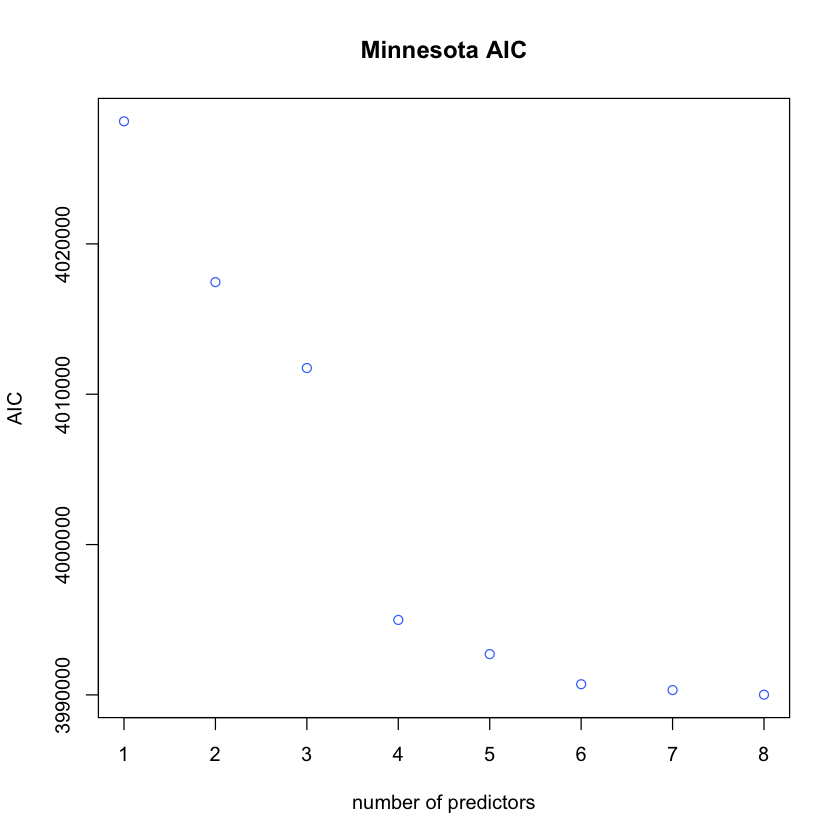

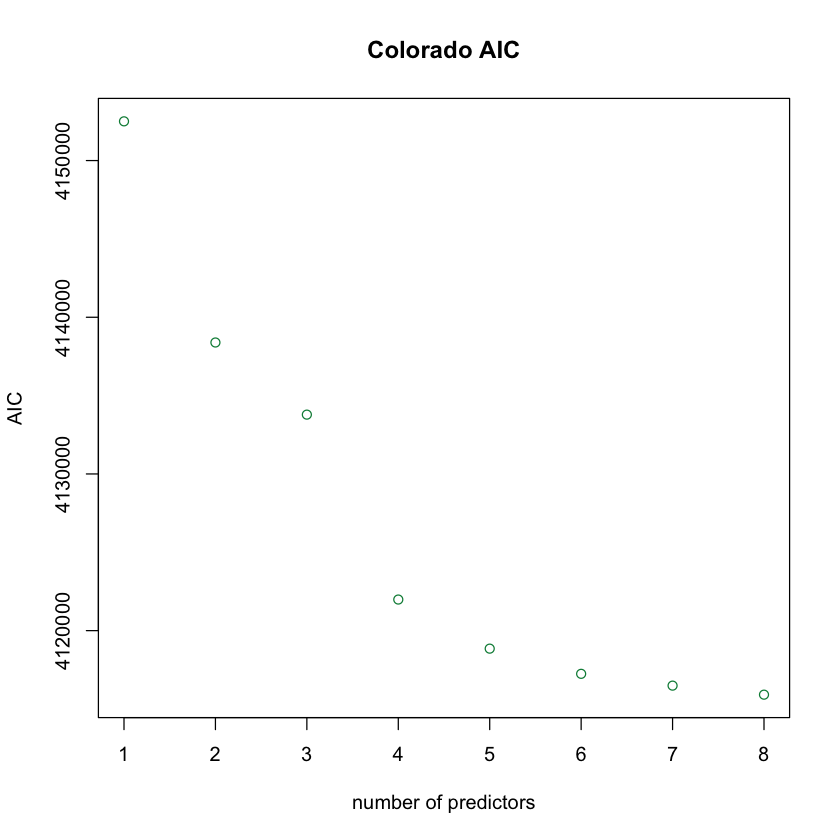

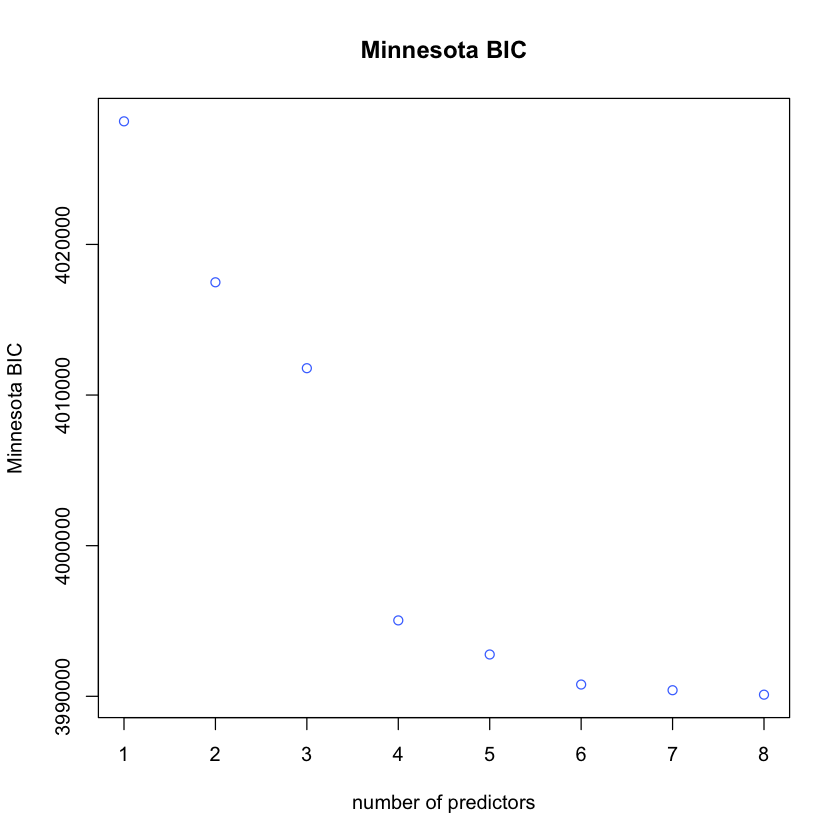

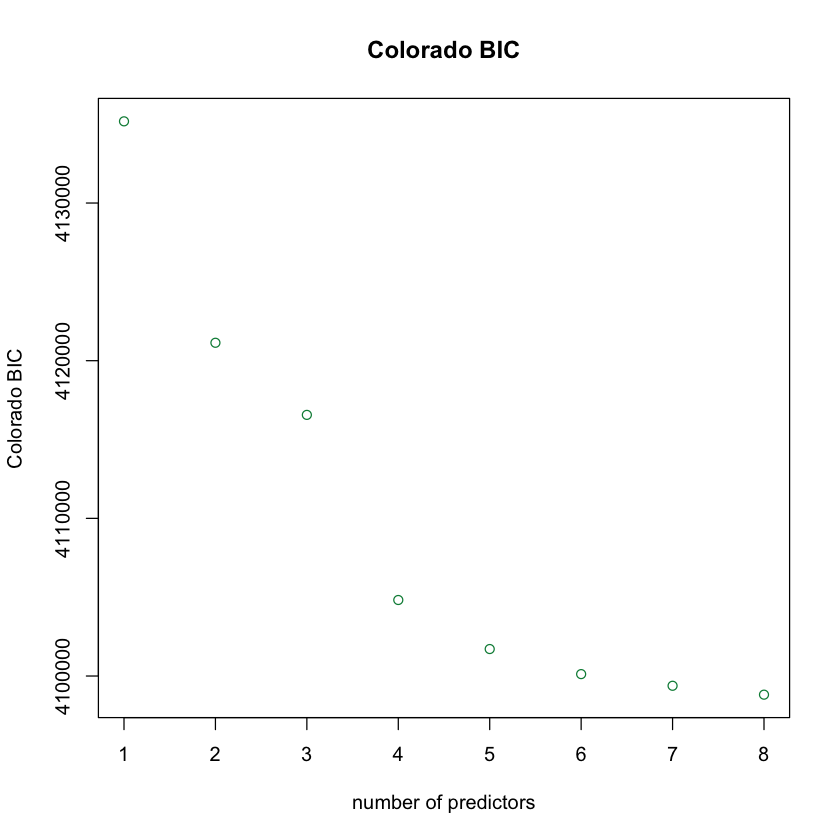

In [5]:
# corr = cor(model.matrix(lmod_co)[,-1])

n = dim(mn)[1]; 
regmn = regsubsets(INCWAGE ~ ., data = mn, really.big=T)
rs = summary(regmn)
rs$which

m = dim(co)[1]; 
regCO = regsubsets(INCWAGE ~ ., data = co, really.big=T)
crs = summary(regCO)
crs$which

AIC_m = 2*(2:9) + n*log(rs$rss/n)
plot(AIC_m ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "Minnesota AIC",
     col = "royalblue1")

AIC_c = 2*(2:9) + n*log(crs$rss/m)
plot(AIC_c ~ I(1:8), xlab = 'number of predictors', ylab = 'AIC', main = "Colorado AIC",
    col = "springgreen4")

# Best predictors in terms of AIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

BIC_m = log(n)*(2:9) + n*log(rs$rss/n) 
plot(BIC_m ~ I(1:8), xlab = "number of predictors", ylab = "Minnesota BIC", 
     main = "Minnesota BIC", col = "royalblue1")

BIC_c = log(m)*(2:9) + m*log(crs$rss/m) 
plot(BIC_c ~ I(1:8), xlab = "number of predictors", ylab = "Colorado BIC", 
     main = "Colorado BIC", col = "springgreen4")

# Best predictors in terms of BIC
# 8 predictors - SEX, AGE, MARRNO, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 7 predictors - SEX, AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS
# 6 predictors - AGE, EDUC, CLASSWKR, UHRSWORK, OCCSCORE, DIFFSENS

In [31]:
lm_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS , mn)
lm_2 = lm(INCWAGE ~ SEX + AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS, mn)
lm_3 = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, mn)
print("Anova test for Minnesota:")
anova(lm_1, lm_2)
anova(lm_2, lm_3)

lmc_1 = lm(INCWAGE ~ AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS , co)
lmc_2 = lm(INCWAGE ~ SEX + AGE + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS, co)
lmc_3 = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, co)
print("Anova test for Colorado:")
anova(lmc_1, lmc_2)
anova(lmc_2, lmc_3)

[1] "Anova test for Minnesota:"


Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 215014 3.664330e+14 NA           NA       NA            NA
2 215013 3.654702e+14  1 962810687844 566.4396 4.854117e-125

Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 215013 3.654702e+14 NA           NA       NA            NA
2 215008 3.645137e+14  5 956495402227 112.8375 1.589352e-119

[1] "Anova test for Colorado:"


Res.Df RSS          Df Sum of Sq    F        Pr(>F)      
1 214116 4.471421e+14 NA           NA       NA           NA
2 214115 4.452606e+14  1 1.881504e+12 904.7694 2.34346e-198

Res.Df RSS          Df Sum of Sq    F        Pr(>F)       
1 214115 4.452606e+14 NA           NA       NA            NA
2 214110 4.440478e+14  5 1.212739e+12 116.9512 5.897514e-124


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn)

Residuals:
    Min      1Q  Median      3Q     Max 
-163805  -15427   -2593    7461  503879 

Coefficients:
                                          Estimate Std. Error  t value Pr(>|t|)
(Intercept)                             -15415.409    992.135  -15.538  < 2e-16
SEXMale                                   4732.775    184.640   25.632  < 2e-16
AGE                                        152.891      6.562   23.300  < 2e-16
MARRNO                                    3453.026    150.937   22.877  < 2e-16
EDUCHigh School or Less                  -9277.663    188.894  -49.116  < 2e-16
CLASSWKRSelf-employed                   -60708.255    476.297 -127.459  < 2e-16
CLASSWKRWorks for wages                 -36376.473    402.739  -90.323  < 2e-16
UHRSWORK                                  1105.168      6.075  181.912  < 2e-16
OCCSCORE                                  1552.


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = co)

Residuals:
    Min      1Q  Median      3Q     Max 
-176198  -18070   -3781    9206  537672 

Coefficients:
                                          Estimate Std. Error  t value Pr(>|t|)
(Intercept)                             -22812.300   1194.895  -19.091  < 2e-16
SEXMale                                   6481.526    203.488   31.852  < 2e-16
AGE                                        214.658      7.209   29.778  < 2e-16
MARRNO                                    3194.059    150.870   21.171  < 2e-16
EDUCHigh School or Less                  -9552.849    213.695  -44.703  < 2e-16
CLASSWKRSelf-employed                   -60305.259    522.586 -115.398  < 2e-16
CLASSWKRWorks for wages                 -38882.823    438.808  -88.610  < 2e-16
UHRSWORK                                  1252.467      6.668  187.830  < 2e-16
OCCSCORE                                  1543.

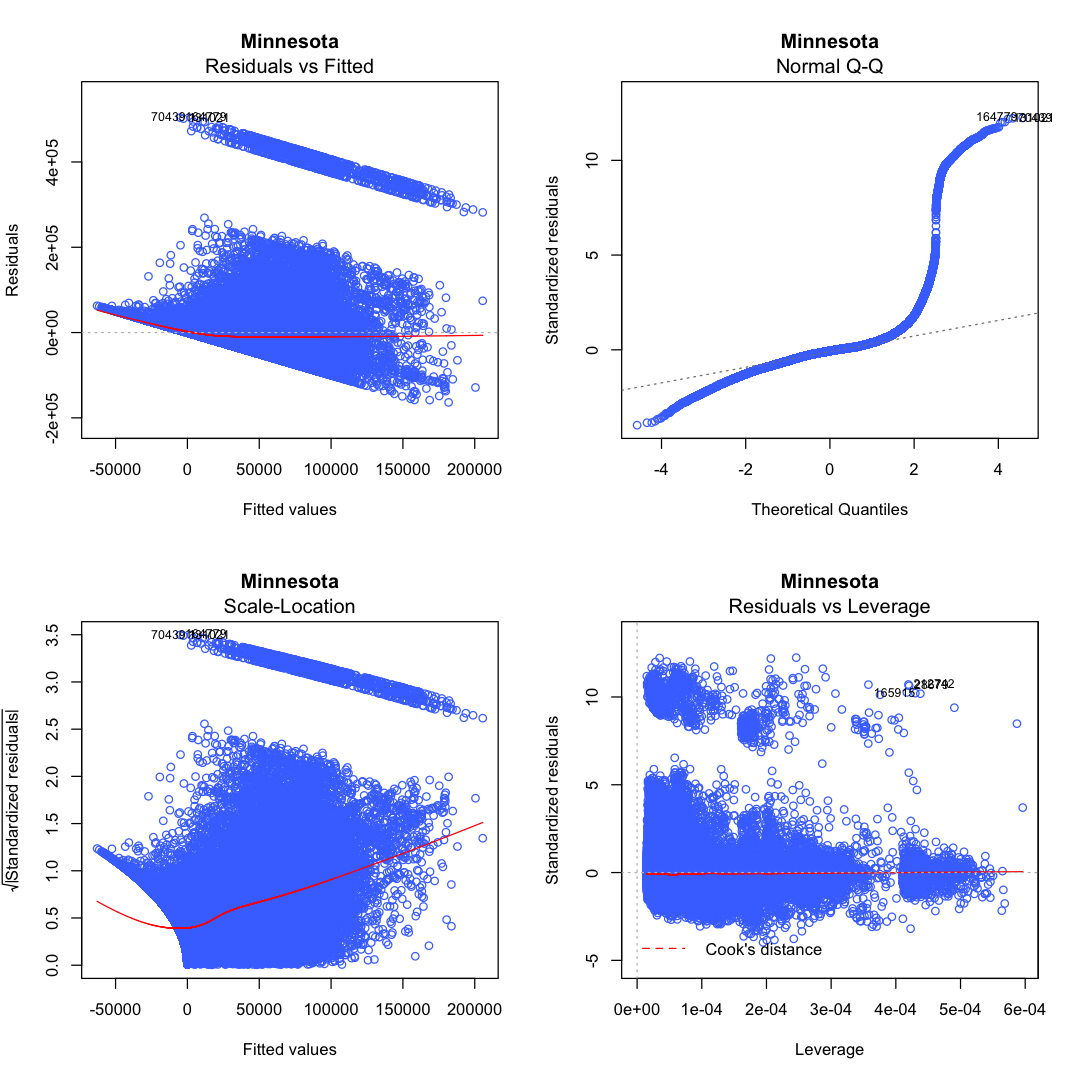

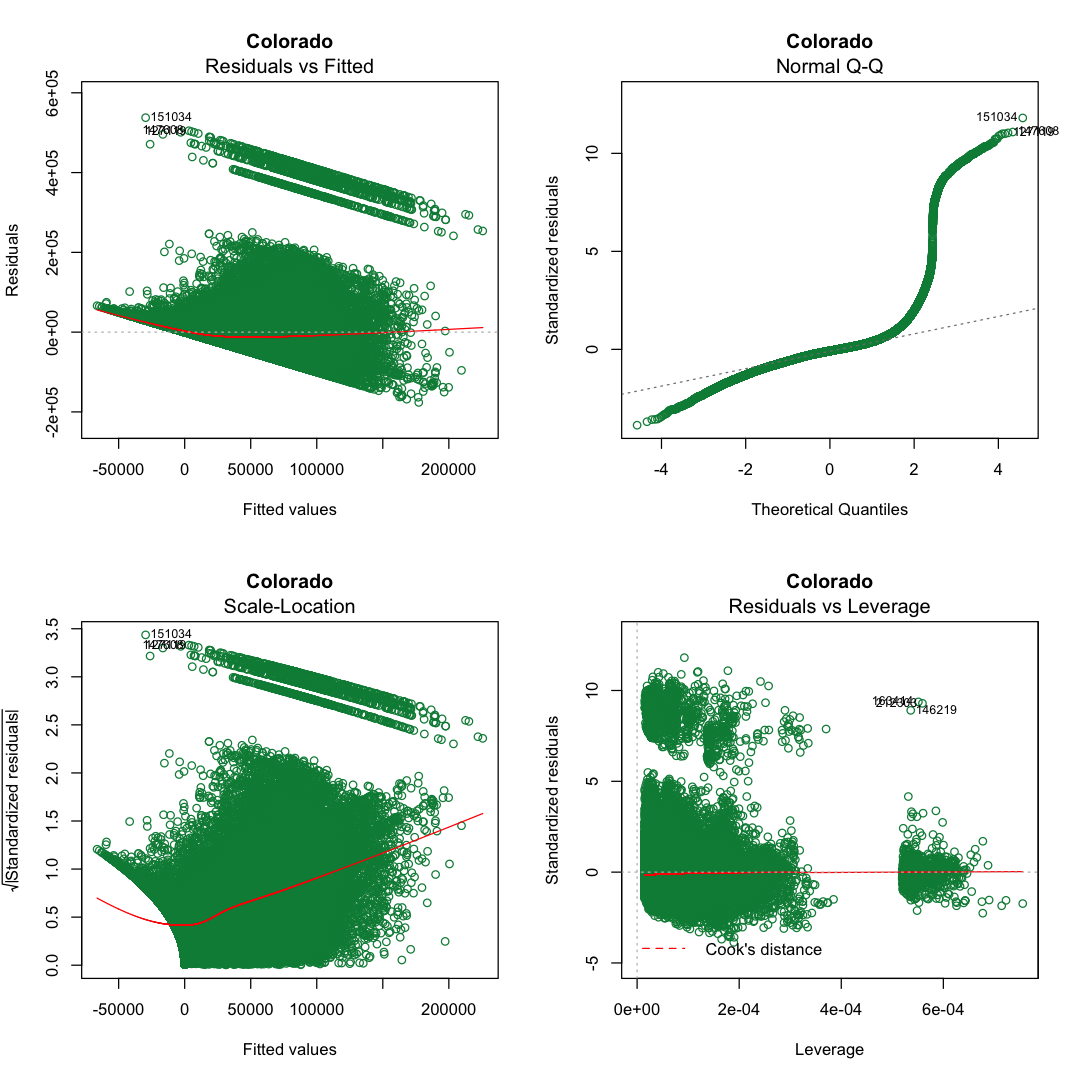

In [32]:
summary(lm_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_3, main = "Minnesota", col = "royalblue1")

summary(lmc_3)
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lmc_3, main = "Colorado", col = "springgreen4")

# Transformations

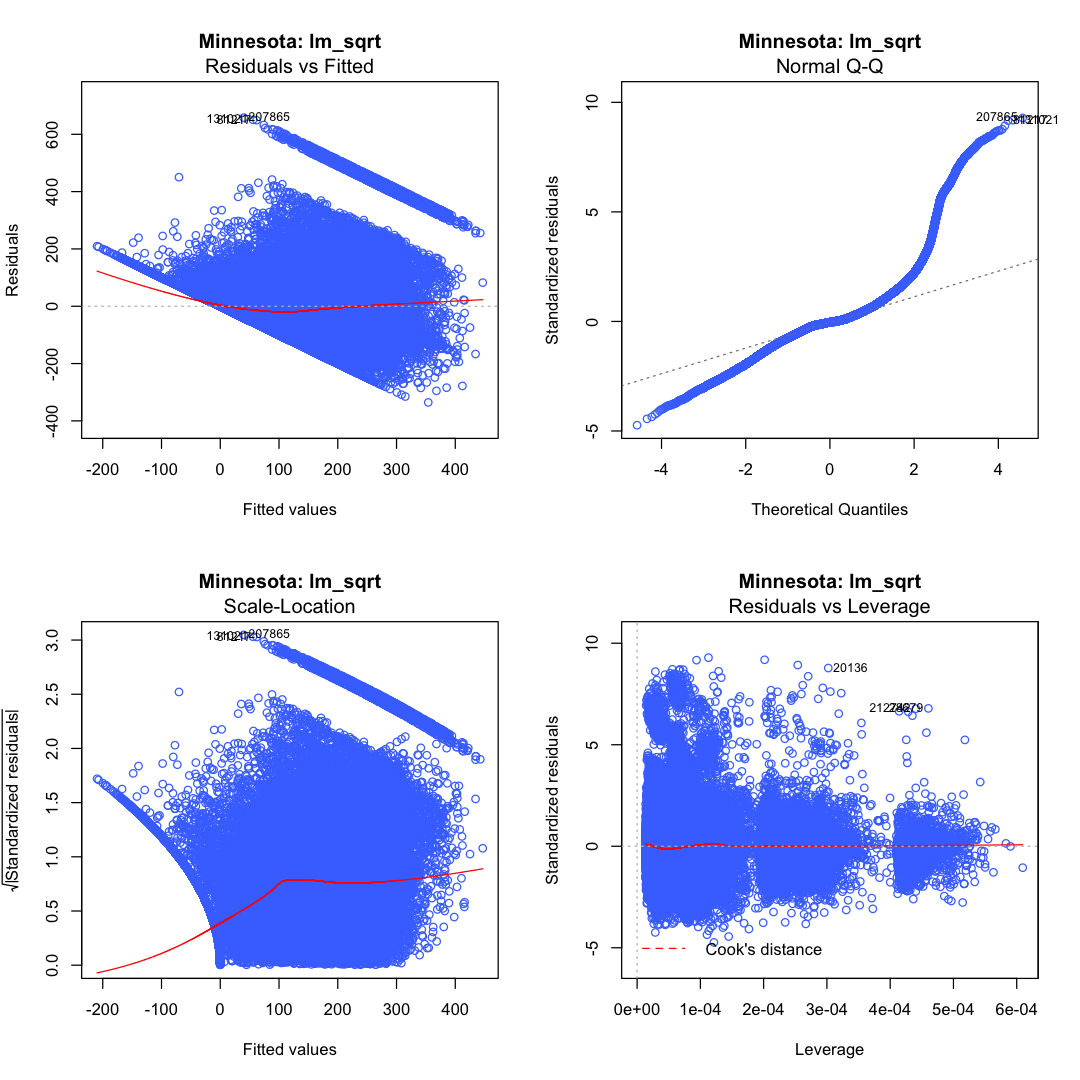

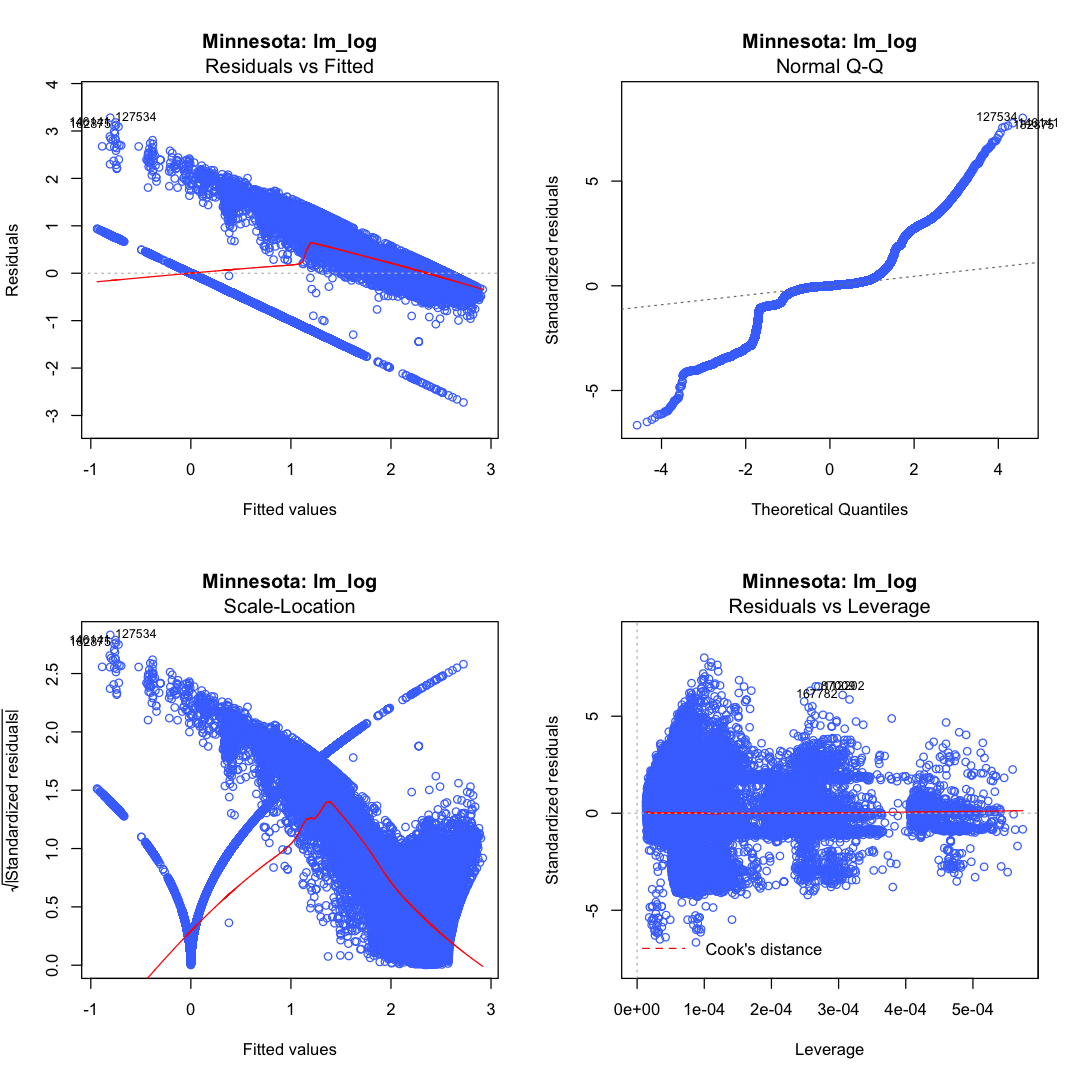

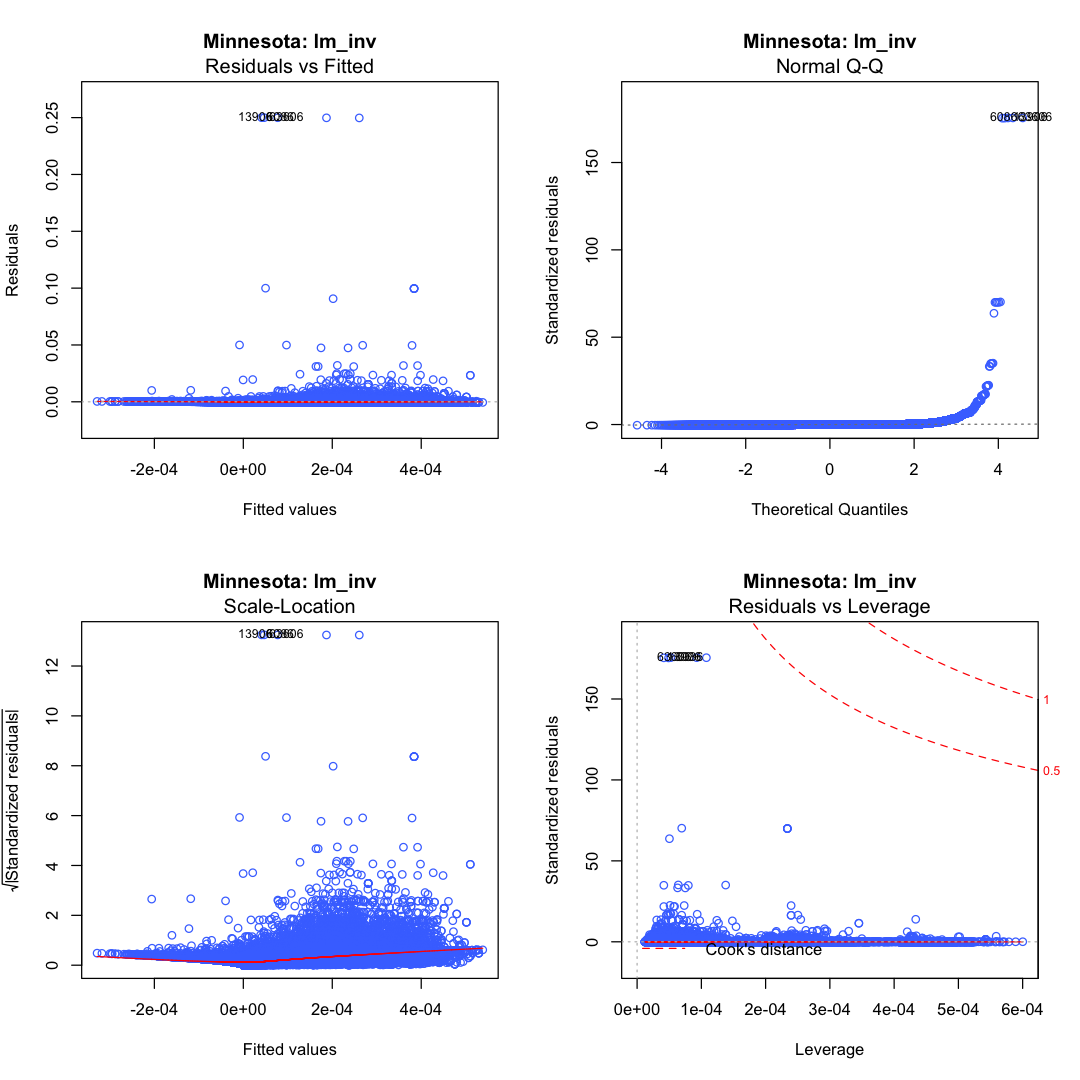

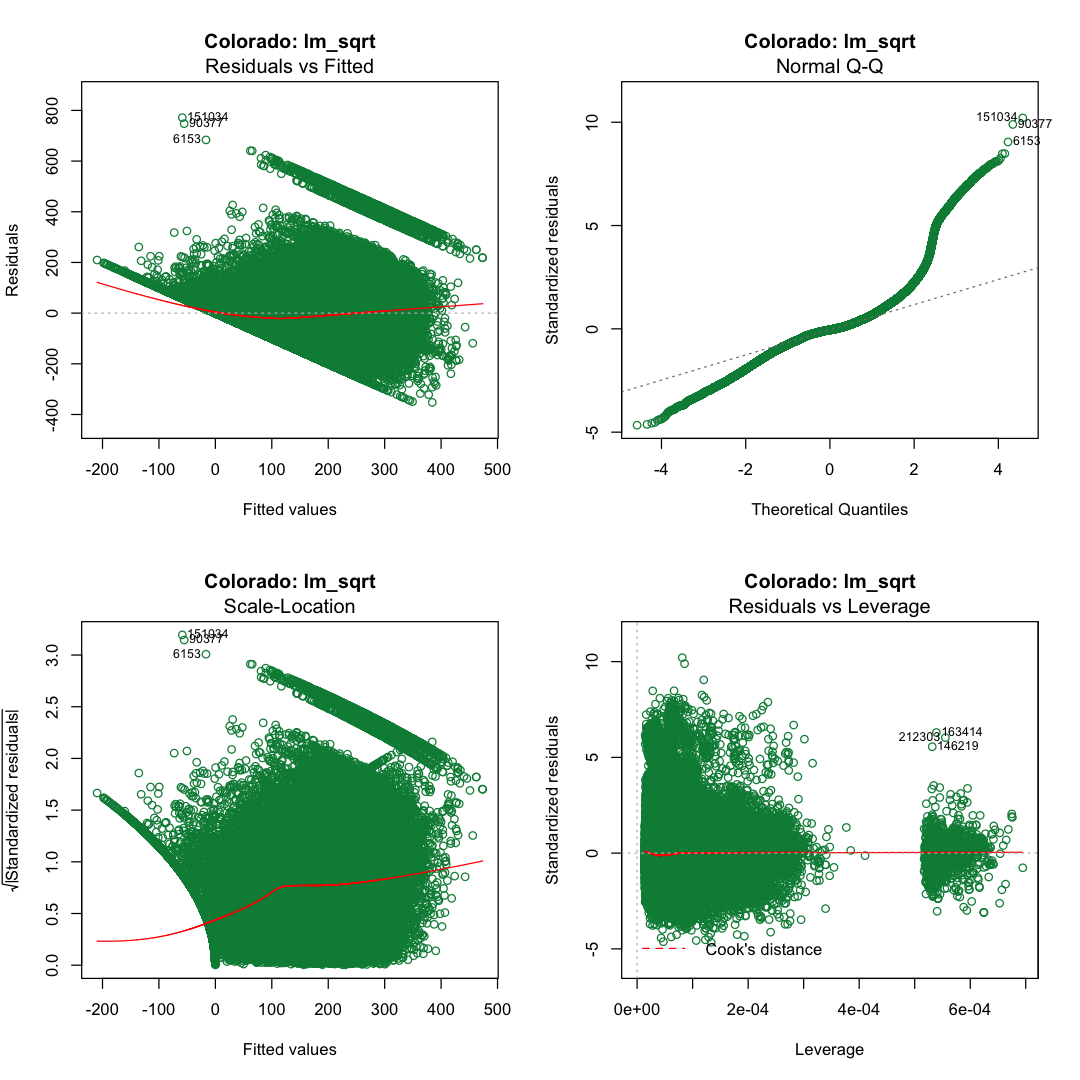

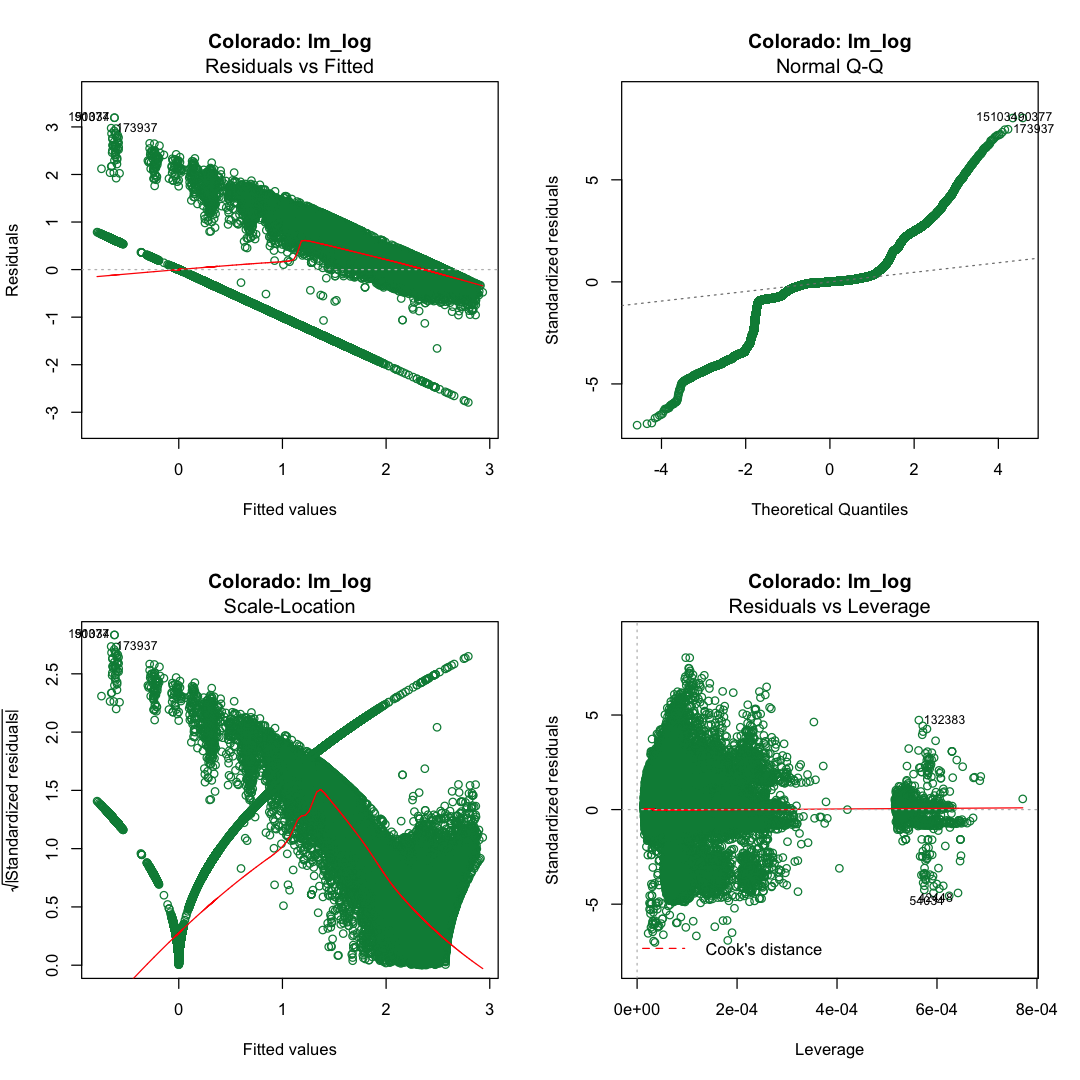

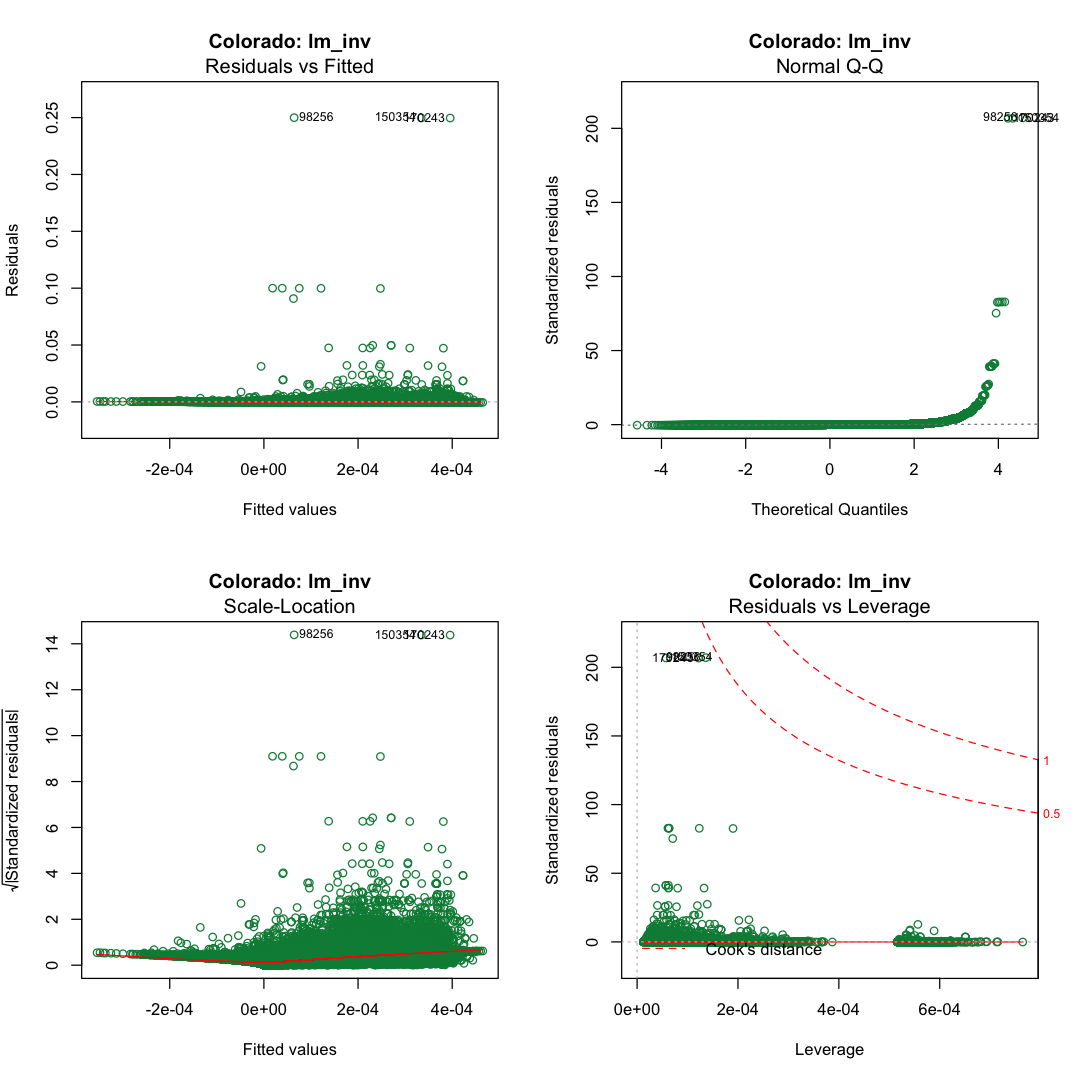

In [9]:
# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$RACE = mn$RACE
testincome$CLASSWKR = mn$CLASSWKR
testincome$DIFFSENS = mn$DIFFSENS
testincome$SEX = mn$SEX

testincome$inc1 = sqrt(mn$INCWAGE)
testincome$sqrt_fam = sqrt(mn$FAMSIZE)
testincome$sqrt_age = sqrt(mn$AGE)
testincome$sqrt_mar = sqrt(mn$MARRNO)
testincome$sqrt_hrs = sqrt(mn$UHRSWORK)
testincome$sqrt_occ = sqrt(mn$OCCSCORE)

testincome$inc2 = mn$INCWAGE
testincome$log_fam = mn$FAMSIZE
testincome$log_age = mn$AGE
testincome$log_mar = mn$MARRNO
testincome$log_hrs = mn$UHRSWORK
testincome$log_occ = mn$OCCSCORE
testincome = na.omit(testincome)

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = mn$INCWAGE
testincome$inv_fam = mn$FAMSIZE
testincome$inv_age = mn$AGE
testincome$inv_mar = mn$MARRNO
testincome$inv_hrs = mn$UHRSWORK
testincome$inv_occ = mn$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + RACE + CLASSWKR +
             DIFFSENS + SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "Minnesota: lm_sqrt", col = "royalblue1")

par(mfrow = c(2,2))
plot(lm_log, main = "Minnesota: lm_log", col = "royalblue1")

par(mfrow = c(2,2))
plot(lm_inv, main = "Minnesota: lm_inv", col = "royalblue1")

# Created transformation to square root, log, and inverse respectively to check constant variance.
testincome = c()
testincome$RACE = co$RACE
testincome$CLASSWKR = co$CLASSWKR
testincome$DIFFSENS = co$DIFFSENS
testincome$SEX = co$SEX

testincome$inc1 = sqrt(co$INCWAGE)
testincome$sqrt_fam = sqrt(co$FAMSIZE)
testincome$sqrt_age = sqrt(co$AGE)
testincome$sqrt_mar = sqrt(co$MARRNO)
testincome$sqrt_hrs = sqrt(co$UHRSWORK)
testincome$sqrt_occ = sqrt(co$OCCSCORE)

testincome$inc2 = co$INCWAGE
testincome$log_fam = co$FAMSIZE
testincome$log_age = co$AGE
testincome$log_mar = co$MARRNO
testincome$log_hrs = co$UHRSWORK
testincome$log_occ = co$OCCSCORE
testincome = na.omit(testincome)

# Takes the log transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$inc2[testincome$inc2 > 0] = log(testincome$inc2[testincome$inc2 > 0])
testincome$log_fam[testincome$log_fam > 0] = log(testincome$log_fam[testincome$log_fam > 0])
testincome$log_age[testincome$log_age > 0] = log(testincome$log_age[testincome$log_age > 0])
testincome$log_mar[testincome$log_mar > 0] = log(testincome$log_mar[testincome$log_mar > 0])
testincome$log_hrs[testincome$log_hrs > 0] = log(testincome$log_hrs[testincome$log_hrs > 0])
testincome$log_occ[testincome$log_occ > 0] = log(testincome$log_occ[testincome$log_occ > 0])

testincome$inc3 = co$INCWAGE
testincome$inv_fam = co$FAMSIZE
testincome$inv_age = co$AGE
testincome$inv_mar = co$MARRNO
testincome$inv_hrs = co$UHRSWORK
testincome$inv_occ = co$OCCSCORE

# Takes the inverse transform of values greater than 0, 
# otherwise we will run into a computational error
testincome$inc3[testincome$inc3 > 0] = 1/testincome$inc3[testincome$inc3 > 0]
testincome$inv_fam[testincome$inv_fam > 0] = 1/testincome$inv_fam[testincome$inv_fam > 0]
testincome$inv_age[testincome$inv_age > 0] = 1/testincome$inv_age[testincome$inv_age > 0]
testincome$inv_mar[testincome$inv_mar > 0] = testincome$inv_mar[testincome$inv_mar > 0]
testincome$inv_hrs[testincome$inv_hrs > 0] = testincome$inv_hrs[testincome$inv_hrs > 0]
testincome$inv_occ[testincome$inv_occ > 0] = testincome$inv_occ[testincome$inv_occ > 0]

testincome = data.frame(testincome)

# Models

lm_sqrt = lm(inc1 ~ sqrt_fam + sqrt_age + sqrt_mar + sqrt_hrs + sqrt_occ + RACE + CLASSWKR +
             DIFFSENS + SEX, data = testincome)
lm_log = lm(inc2 ~ log_fam + log_age + log_mar + log_hrs + log_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)
lm_inv = lm(inc3 ~ inv_fam + inv_age + inv_mar + inv_hrs + inv_occ + RACE + CLASSWKR +
            DIFFSENS + SEX, data = testincome)

# Plotting Residuals vs. Fitted, QQ Plot, etc. for lm_sqrt, lm_log, and lm_inv.
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(lm_sqrt, main = "Colorado: lm_sqrt", col = "springgreen4")

par(mfrow = c(2,2))
plot(lm_log, main = "Colorado: lm_log", col = "springgreen4")

par(mfrow = c(2,2))
plot(lm_inv, main = "Colorado: lm_inv", col = "springgreen4")

# Checking for Multicollinearity

## Minnesota ##

In [11]:
# Since the transformations failed, 
# we are going to continue with our original model without transformations

v = vif(lm_3)
k = kappa(lm_3)
correlation = cor(model.matrix(lm_3)[,-1])

cat("VIF for the Minnesota dataset is:"); v
cat("The condition number for the Minnesota dataset is:"); k
cat("Correlation Model Matrix for the Minnesota dataset is:"); correlation

VIF for the Minnesota dataset is:

GVIF     Df GVIF^(1/(2*Df))
SEX      1.080961 1  1.039693       
AGE      1.877964 1  1.370388       
MARRNO   1.306469 1  1.143009       
EDUC     1.115156 1  1.056010       
CLASSWKR 3.560675 2  1.373672       
UHRSWORK 2.041685 1  1.428875       
OCCSCORE 2.849066 1  1.687918       
DIFFSENS 1.106629 1  1.051964       
RACE     1.049937 4  1.006110

The condition number for the Minnesota dataset is:

[1] 1775.514

Correlation Model Matrix for the Minnesota dataset is:

SEXMale      AGE         MARRNO      
SEXMale                                  1.000000000 -0.03672824 -0.059084758
AGE                                     -0.036728239  1.00000000  0.448833756
MARRNO                                  -0.059084758  0.44883376  1.000000000
EDUCHigh School or Less                  0.053602325  0.14004772 -0.009269013
CLASSWKRSelf-employed                    0.123137889  0.04051634  0.062142192
CLASSWKRWorks for wages                 -0.003484196 -0.47078507 -0.138822334
UHRSWORK                                 0.174927503 -0.42109493 -0.061212850
OCCSCORE                                 0.144203411 -0.34897610 -0.024518222
DIFFSENSNo vision or hearing difficulty -0.058013071 -0.26892968 -0.075946494
RACEAsian American or Pacific Islander  -0.010260914 -0.09924669 -0.060279836
RACEBlack/African American               0.014657249 -0.08079923 -0.065462134
RACEOther Race                           0.004438377 -0.09502339 -0.056743234
RACEWhite                               -0.005983443  0.16471119  0.116001854
                                        EDUCHigh School or Less
SEXMale                                  0.053602325           
AGE                                      0.140047723           
MARRNO                                  -0.009269013           
EDUCHigh School or Less                  1.000000000           
CLASSWKRSelf-employed                   -0.004130447           
CLASSWKRWorks for wages                 -0.170480644           
UHRSWORK                                -0.193432496           
OCCSCORE                                -0.283487525           
DIFFSENSNo vision or hearing difficulty -0.097778165           
RACEAsian American or Pacific Islander  -0.007222394           
RACEBlack/African American               0.037690151           
RACEOther Race                           0.034004249           
RACEWhite                               -0.050001330           
                                        CLASSWKRSelf-employed
SEXMale                                  0.123137889         
AGE                                      0.040516336         
MARRNO                                   0.062142192         
EDUCHigh School or Less                 -0.004130447         
CLASSWKRSelf-employed                    1.000000000         
CLASSWKRWorks for wages                 -0.492159465         
UHRSWORK                                 0.162898050         
OCCSCORE                                 0.146825345         
DIFFSENSNo vision or hearing difficulty  0.020428622         
RACEAsian American or Pacific Islander  -0.030074418         
RACEBlack/African American              -0.031119331         
RACEOther Race                          -0.019918165         
RACEWhite                                0.054110494         
                                        CLASSWKRWorks for wages UHRSWORK    
SEXMale                                 -0.003484196             0.174927503
AGE                                     -0.470785072            -0.421094935
MARRNO                                  -0.138822334            -0.061212850
EDUCHigh School or Less                 -0.170480644            -0.193432496
CLASSWKRSelf-employed                   -0.492159465             0.162898050
CLASSWKRWorks for wages                  1.000000000             0.493489594
UHRSWORK                                 0.493489594             1.000000000
OCCSCORE                                 0.593576999             0.619667646
DIFFSENSNo vision or hearing difficulty  0.194089668             0.202536272
RACEAsian American or Pacific Islander   0.031664106             0.003881763
RACEBlack/African American               0.023244743            -0.020123221
RACEOther Race                           0.032923312             0.004858581
RACEWhite                               -0.048636130             0.016063358
                                        OCCSCORE    
SEXMale                                  0.144203411


## Colorado ##

In [12]:
v_c = vif(lmc_3)
k_c = kappa(lmc_3)
correlation_c = cor(model.matrix(lmc_3)[,-1])

cat("VIF for the Colorado dataset is:"); v_c
cat("The condition number for the Colorado dataset is:"); k_c
cat("Correlation Model Matrix for the Colorado dataset is:"); correlation_c

VIF for the Colorado dataset is:

GVIF     Df GVIF^(1/(2*Df))
SEX      1.068623 1  1.033742       
AGE      1.780713 1  1.334434       
MARRNO   1.351962 1  1.162739       
EDUC     1.098112 1  1.047908       
CLASSWKR 3.430828 2  1.360974       
UHRSWORK 2.023393 1  1.422460       
OCCSCORE 2.813359 1  1.677307       
DIFFSENS 1.100868 1  1.049222       
RACE     1.029383 4  1.003626

The condition number for the Colorado dataset is:

[1] 2098.237

Correlation Model Matrix for the Colorado dataset is:

SEXMale      AGE          MARRNO     
SEXMale                                  1.000000000 -0.050745503 -0.06751557
AGE                                     -0.050745503  1.000000000  0.48961612
MARRNO                                  -0.067515571  0.489616117  1.00000000
EDUCHigh School or Less                  0.025823138  0.007703764 -0.01719788
CLASSWKRSelf-employed                    0.065751632  0.062913495  0.07357839
CLASSWKRWorks for wages                  0.049682611 -0.429024011 -0.15066917
UHRSWORK                                 0.188468300 -0.378788267 -0.08972016
OCCSCORE                                 0.157708400 -0.269854734 -0.02681930
DIFFSENSNo vision or hearing difficulty -0.040435974 -0.263357025 -0.09089712
RACEAsian American or Pacific Islander  -0.018075885 -0.045406118 -0.03516517
RACEBlack/African American               0.018399114 -0.036162696 -0.03943077
RACEOther Race                           0.004066100 -0.083521134 -0.04899661
RACEWhite                               -0.001291061  0.104011496  0.07525039
                                        EDUCHigh School or Less
SEXMale                                  0.025823138           
AGE                                      0.007703764           
MARRNO                                  -0.017197877           
EDUCHigh School or Less                  1.000000000           
CLASSWKRSelf-employed                   -0.048263930           
CLASSWKRWorks for wages                 -0.108146545           
UHRSWORK                                -0.153898856           
OCCSCORE                                -0.260625883           
DIFFSENSNo vision or hearing difficulty -0.072806011           
RACEAsian American or Pacific Islander  -0.010118380           
RACEBlack/African American               0.035937720           
RACEOther Race                           0.085726717           
RACEWhite                               -0.081912871           
                                        CLASSWKRSelf-employed
SEXMale                                  0.06575163          
AGE                                      0.06291350          
MARRNO                                   0.07357839          
EDUCHigh School or Less                 -0.04826393          
CLASSWKRSelf-employed                    1.00000000          
CLASSWKRWorks for wages                 -0.48944736          
UHRSWORK                                 0.09716755          
OCCSCORE                                 0.17754938          
DIFFSENSNo vision or hearing difficulty  0.01848322          
RACEAsian American or Pacific Islander  -0.01300455          
RACEBlack/African American              -0.03187127          
RACEOther Race                          -0.02499355          
RACEWhite                                0.04535448          
                                        CLASSWKRWorks for wages UHRSWORK    
SEXMale                                  0.049682611             0.188468300
AGE                                     -0.429024011            -0.378788267
MARRNO                                  -0.150669173            -0.089720158
EDUCHigh School or Less                 -0.108146545            -0.153898856
CLASSWKRSelf-employed                   -0.489447360             0.097167553
CLASSWKRWorks for wages                  1.000000000             0.538698219
UHRSWORK                                 0.538698219             1.000000000
OCCSCORE                                 0.570751678             0.614726798
DIFFSENSNo vision or hearing difficulty  0.180503990             0.184759789
RACEAsian American or Pacific Islander   0.009148173             0.004376109
RACEBlack/African American               0.011153670            -0.011957993
RACEOther Race                           0.026066331             0.008658828
RACEWhite                               -0.029012701             0.001746358
                                        OCCSCORE    
SEXMale                                  0.157708400


## Removing Predictor with the Highest VIF ##

## Minnesota ##

In [13]:
#Removing predictor with the highest VIF
lm_3 = update(lm_3, .~. - CLASSWKR)
cat("VIF after removing CLASSWKR for Minnesota dataset is:")
vif(lm_3)

cat("The updated condition number for the Minnesota dataset is:")
kappa(lm_3)

VIF after removing CLASSWKR for Minnesota dataset is:

GVIF     Df GVIF^(1/(2*Df))
SEX      1.062153 1  1.030608       
AGE      1.704006 1  1.305376       
MARRNO   1.305776 1  1.142705       
EDUC     1.107146 1  1.052210       
UHRSWORK 1.813912 1  1.346816       
OCCSCORE 1.750202 1  1.322952       
DIFFSENS 1.104665 1  1.051031       
RACE     1.047572 4  1.005826

The updated condition number for the Minnesota dataset is:

[1] 1817.422

## Colorado ##

In [15]:
#Removing predictor with the highest VIF
lmc_3 = update(lmc_3, .~. - CLASSWKR)
cat("VIF after removing CLASSWKR for Colorado dataset is:")
vif(lmc_3)

cat("The updated condition number for the Colorado dataset is:")
kappa(lmc_3)

VIF after removing CLASSWKR for Colorado dataset is:

GVIF     Df GVIF^(1/(2*Df))
SEX      1.058864 1  1.029011       
AGE      1.642388 1  1.281557       
MARRNO   1.350638 1  1.162169       
EDUC     1.093632 1  1.045768       
UHRSWORK 1.782488 1  1.335099       
OCCSCORE 1.718930 1  1.311080       
DIFFSENS 1.099227 1  1.048440       
RACE     1.027606 4  1.003410

The updated condition number for the Colorado dataset is:

[1] 2111.812

## MSE and MSPE on Testing and Training data ##

In [42]:
set.seed(00000)
n = nrow(mn)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train_m = mn[sample_set, ]
test_m = mn[-sample_set, ]

n = nrow(co)
split = floor(0.80 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

train_c = co[sample_set, ]
test_c =  co[-sample_set, ]

In [43]:
mlr_inc_m = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = train_m)
mlr_inc_c = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = train_c)

summary(mlr_inc_m)
summary(mlr_inc_c)


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, data = train_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-136942  -17789   -2402   10713  495317 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -28859.247   1130.816 -25.521  < 2e-16
SEXMale                                   4827.365    213.029  22.661  < 2e-16
AGE                                        271.132      7.274  37.277  < 2e-16
MARRNO                                    2977.697    175.626  16.955  < 2e-16
EDUCHigh School or Less                 -11243.827    219.040 -51.332  < 2e-16
UHRSWORK                                   875.083      6.676 131.082  < 2e-16
OCCSCORE                                   926.172      9.357  98.982  < 2e-16
DIFFSENSNo vision or hearing difficulty   1861.343    421.949   4.411 1.03e-05
RACEAsian American or Pacific Islander    6765.629   1160.757 


Call:
lm(formula = INCWAGE ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, data = train_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-154285  -20674   -3930   11520  495997 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -38178.005   1358.258 -28.108  < 2e-16
SEXMale                                   7340.961    234.095  31.359  < 2e-16
AGE                                        335.890      8.009  41.941  < 2e-16
MARRNO                                    2734.373    174.530  15.667  < 2e-16
EDUCHigh School or Less                 -10959.521    246.546 -44.452  < 2e-16
UHRSWORK                                  1038.669      7.226 143.742  < 2e-16
OCCSCORE                                   877.702      9.630  91.142  < 2e-16
DIFFSENSNo vision or hearing difficulty   3521.484    471.188   7.474 7.84e-14
RACEAsian American or Pacific Islander    6557.587   1356.076 

In [49]:
# MSPE for Minnesota
k = nrow(test_m) #number of rows

y = train_m$INCWAGE
y_star = test_m$INCWAGE

X = cbind(1, train_m$AGE, train_m$FAMSIZE, train_m$MARRNO, train_m$UHRSWORK, train_m$OCCSCORE) #train model

X_star = cbind(1, test_m$AGE, test_m$FAMSIZE, test_m$MARRNO, test_m$UHRSWORK, test_m$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta #i'th response value in test set

MSPE_m = (1/k)*sum((y_star - y_hat_star)^2)

cat("MSPE for the Minnesota dataset is:", MSPE_m, "\n")


# # MSPE for Colorado
k = nrow(test_c)

y = train_c$INCWAGE
y_star = test_c$INCWAGE

X = cbind(1, train_c$AGE, train_c$FAMSIZE, train_c$MARRNO, train_c$UHRSWORK, train_c$OCCSCORE) #train model
X_star = cbind(1, test_c$AGE, test_c$FAMSIZE, test_c$MARRNO, test_c$UHRSWORK, test_c$OCCSCORE) #test model

beta = solve(t(X)%*%X)%*%t(X)%*%y

y_hat_star = X_star%*%beta

MSPE_c = (1/k)*sum((y_star - y_hat_star)^2)

cat("MSPE for the Colorado dataset is:", MSPE_c)

MSPE for the Minnesota dataset is: 1789101585 
MSPE for the Colorado dataset is: 2177939189

In [50]:
# MSE for Minnesota
n = nrow(train_m) # number of rows
y = train_m$INCWAGE
X = cbind(1, train_m$AGE, train_m$FAMSIZE, train_m$MARRNO, train_m$UHRSWORK, train_m$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE_m = (1/n)*sum((y - y_hat)^2); 

cat("MSE for the Minnesota dataset is:", MSE_m, "\n")


# MSE for Colorado
n = nrow(train_c) # number of rows
y = train_c$INCWAGE
X = cbind(1, train_c$AGE, train_c$FAMSIZE, train_c$MARRNO, train_c$UHRSWORK, train_c$OCCSCORE)
beta = solve(t(X)%*%X)%*%t(X)%*%y #beta hat
y_hat = X%*%beta # computing y_hat
MSE_c = (1/n)*sum((y - y_hat)^2); 

cat("MSE for the Colorado dataset is:", MSE_c)

MSE for the Minnesota dataset is: 1866276235 
MSE for the Colorado dataset is: 2248374967

In [53]:
MSE_m - MSPE_m

MSE_c - MSPE_c

MSPE_m/MSE_m

MSPE_c/MSE_c

[1] 77174650

[1] 70435777

[1] 0.9586478

[1] 0.9686726

## Prediction Plot ##

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


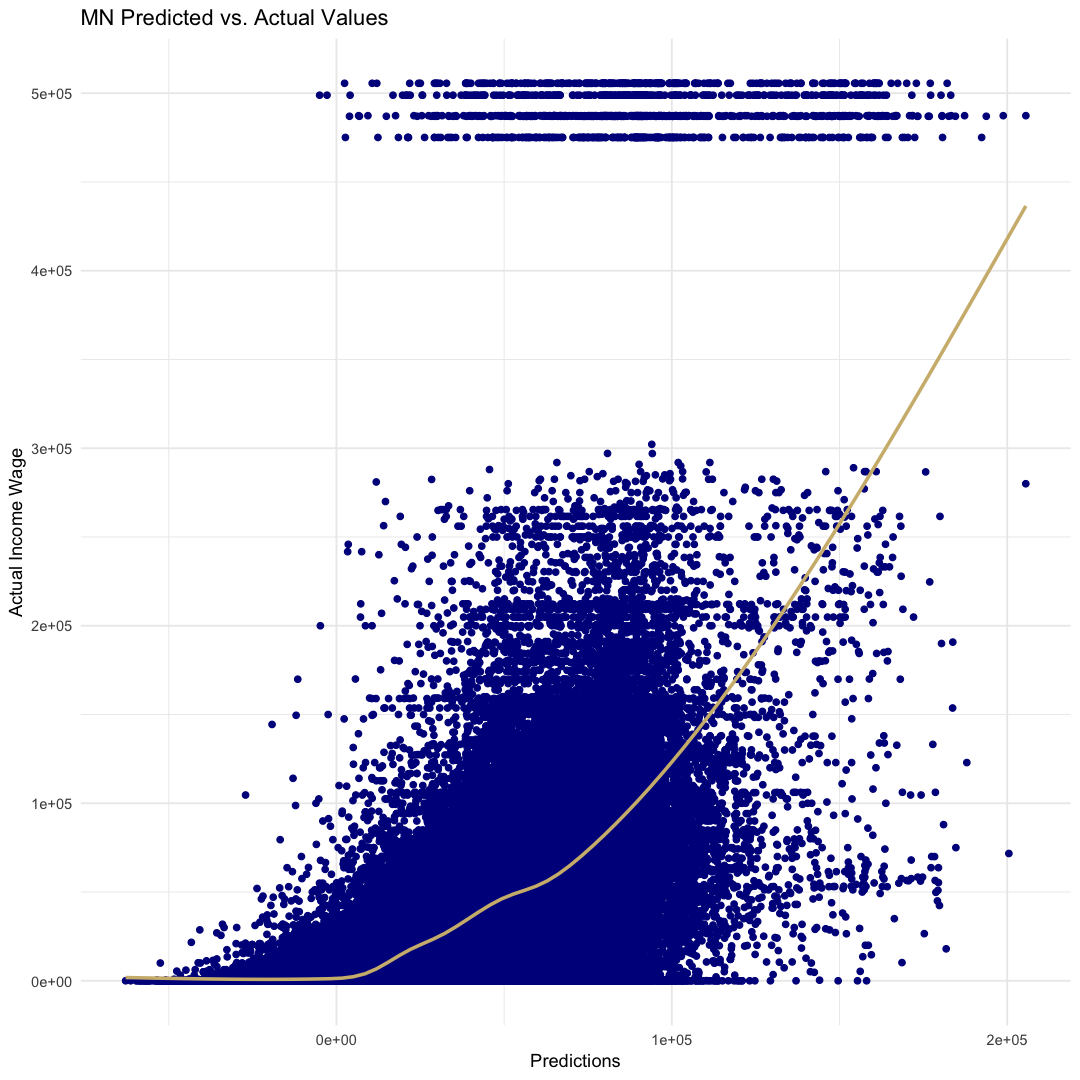

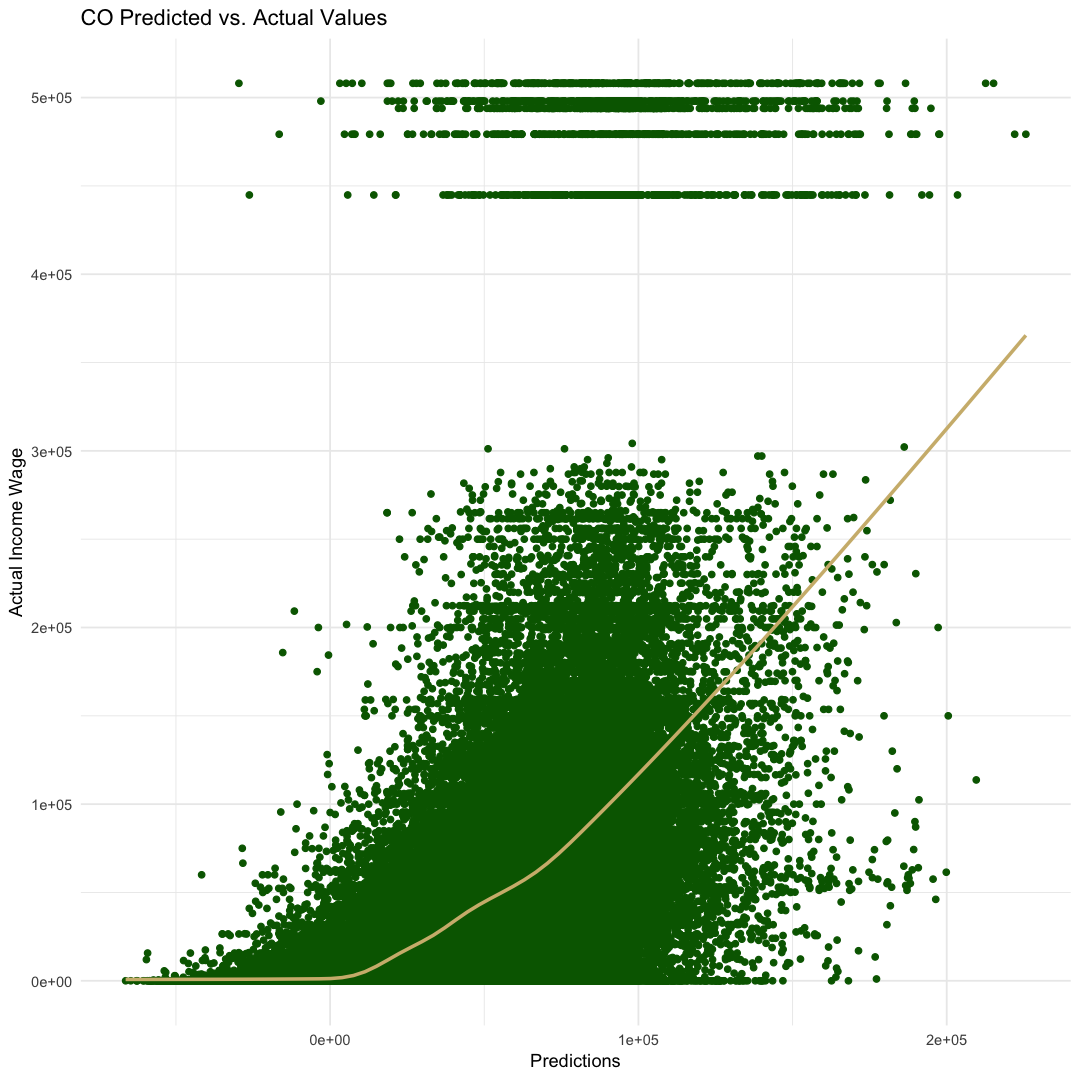

In [63]:
lmod_m = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, mn)
 
ggplot(mn, aes(x = predict(lmod_m, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark blue") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='MN Predicted vs. Actual Values') + 
    theme_minimal()

lmod_c = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, co)
 
ggplot(co, aes(x = predict(lmod_c, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark green") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='CO Predicted vs. Actual Values') + 
    theme_minimal()

# Logistic Regression

In [83]:
mn$EDUC = as_factor(mn$EDUC)
mn$DIFFSENS = as_factor(mn$DIFFSENS)
mn$SEX = as_factor(mn$SEX)
mn$RACE = as_factor(mn$RACE)

co$EDUC = as_factor(co$EDUC)
co$CLASSWKR = as_factor(co$CLASSWKR)
co$DIFFSENS = as_factor(co$DIFFSENS)
co$SEX = as_factor(co$SEX)
co$RACE = as_factor(co$RACE)

In [84]:
mn$INCTHRES = NA
mn$INCTHRES[mn$INCWAGE < 35000] =  0
mn$INCTHRES[mn$INCWAGE > 35000] =  1

co$INCTHRESH = NA
co$INCTHRESH[co$INCWAGE < 35000] =  0
co$INCTHRESH[co$INCWAGE > 35000] =  1

In [85]:
glm_mn = glm(INCTHRES ~ SEX + AGE + MARRNO + EDUC + 
             UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = mn, family = binomial)
summary(glm_mn)

glm_co = glm(INCTHRESH ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, data = co, 
             family = binomial)
summary(glm_co)


Call:
glm(formula = INCTHRES ~ SEX + AGE + MARRNO + EDUC + UHRSWORK + 
    OCCSCORE + DIFFSENS + RACE, family = binomial, data = mn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9409  -0.5454  -0.1122   0.6806   3.1220  

Coefficients:
                                          Estimate Std. Error  z value Pr(>|z|)
(Intercept)                             -5.8211565  0.0510955 -113.927  < 2e-16
SEXMale                                  0.1697083  0.0126977   13.365  < 2e-16
AGE                                      0.0015311  0.0004942    3.098  0.00195
MARRNO                                   0.3972877  0.0107040   37.116  < 2e-16
EDUCHigh School or Less                 -0.8340890  0.0132142  -63.121  < 2e-16
UHRSWORK                                 0.0878443  0.0005493  159.907  < 2e-16
OCCSCORE                                 0.0606324  0.0006627   91.494  < 2e-16
DIFFSENSNo vision or hearing difficulty  0.5020317  0.0352454   14.244  < 2e-16
RACEOther Race   


Call:
glm(formula = INCTHRESH ~ SEX + AGE + MARRNO + EDUC + CLASSWKR + 
    UHRSWORK + OCCSCORE + DIFFSENS + RACE, family = binomial, 
    data = co)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1154  -0.4651  -0.0001   0.5790   3.5993  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -2.242e+01  4.818e+01  -0.465 0.641689
SEXMale                                  2.478e-01  1.336e-02  18.543  < 2e-16
AGE                                      2.132e-02  5.424e-04  39.300  < 2e-16
MARRNO                                   3.026e-01  1.031e-02  29.340  < 2e-16
EDUCCollege or More                      8.346e-01  1.441e-02  57.921  < 2e-16
CLASSWKRSelf-employed                    1.236e+01  4.818e+01   0.256 0.797609
CLASSWKRWorks for wages                  1.446e+01  4.818e+01   0.300 0.764048
UHRSWORK                                 1.005e-01  6.234e-04 161.185  < 2e-16
OCCSCORE 

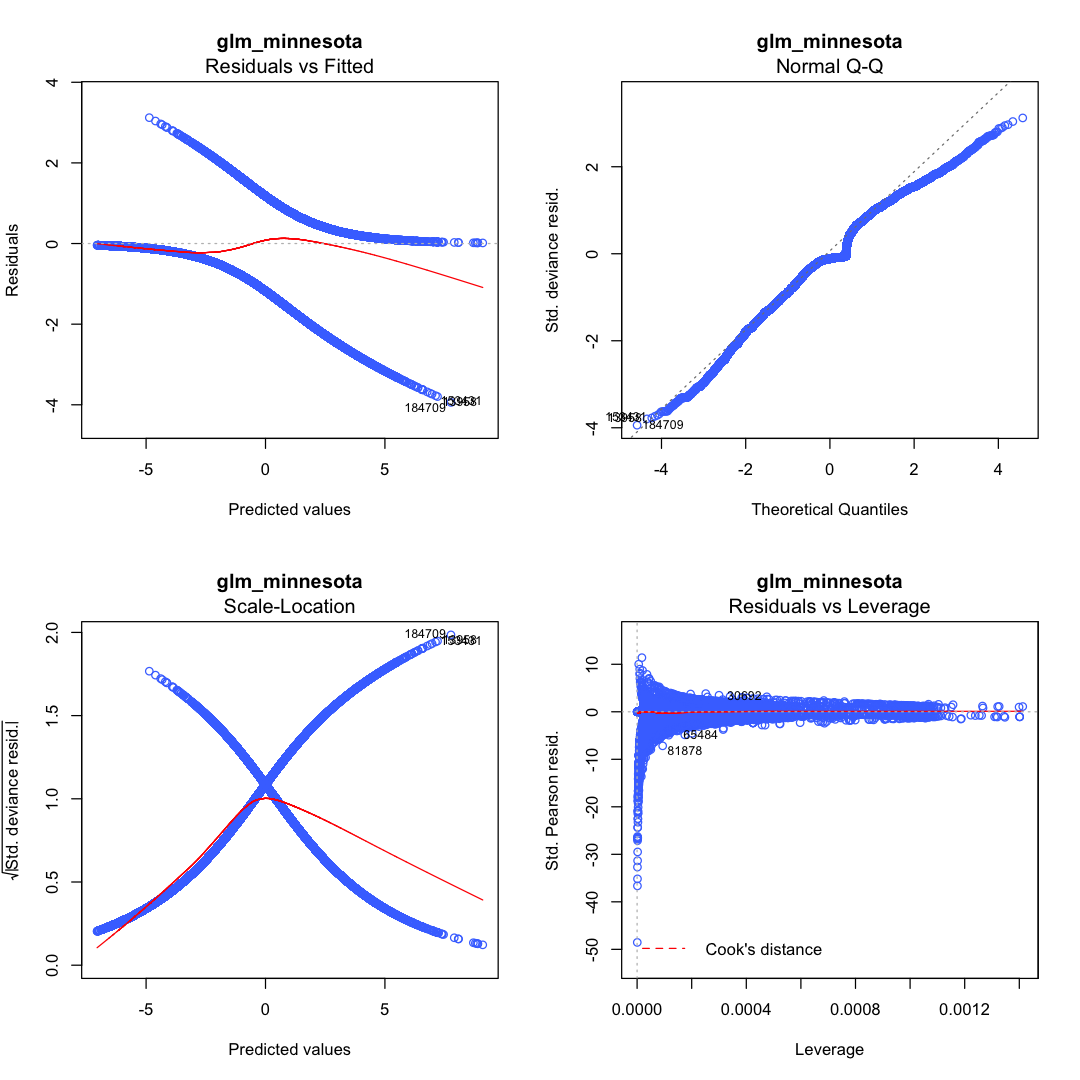

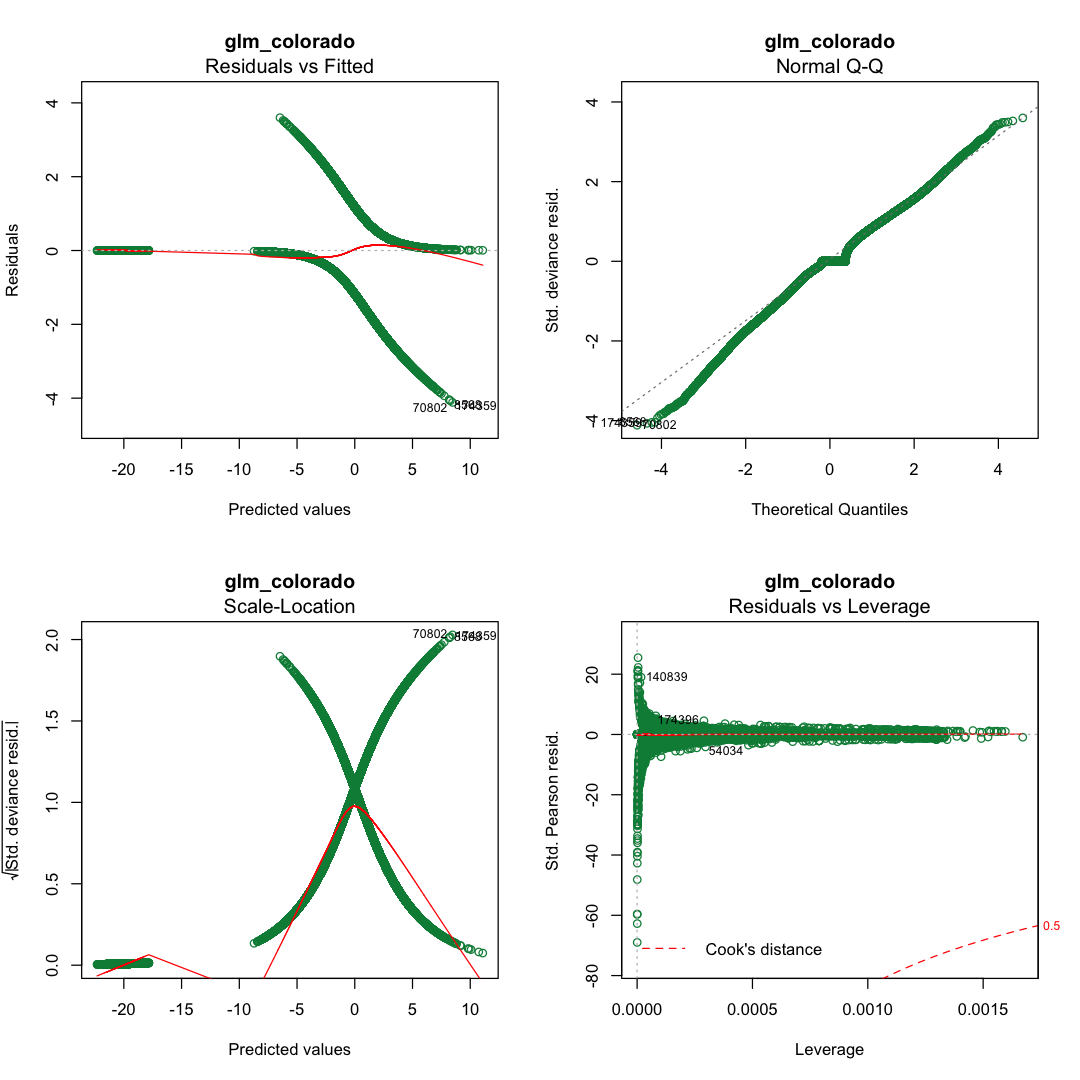

In [66]:
options(repr.plot.width = 9, repr.plot.height = 9)
par(mfrow = c(2,2))
plot(glm_mn, main = "glm_minnesota", col = "royalblue1")
plot(glm_co, main = "glm_colorado", col = "springgreen4")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


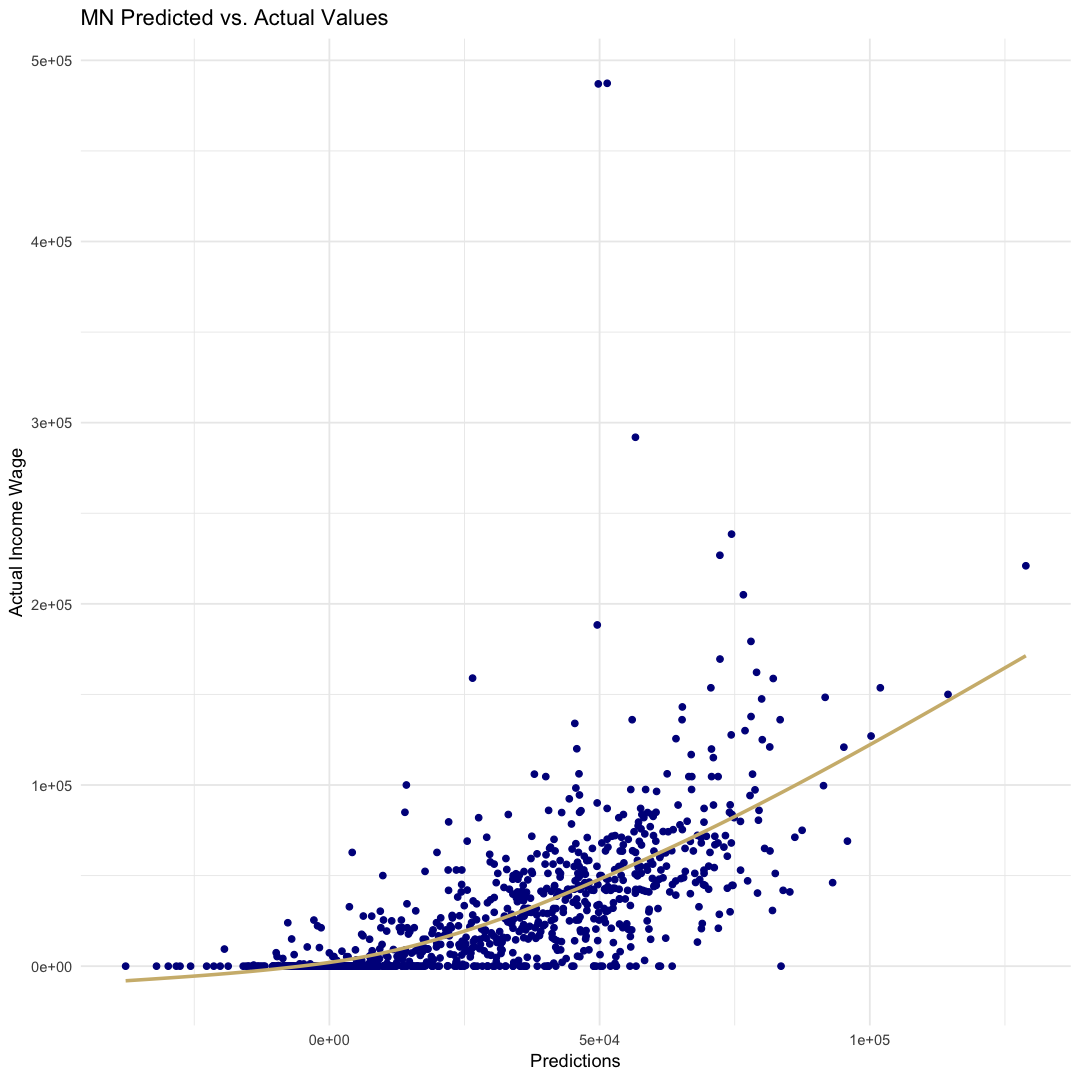

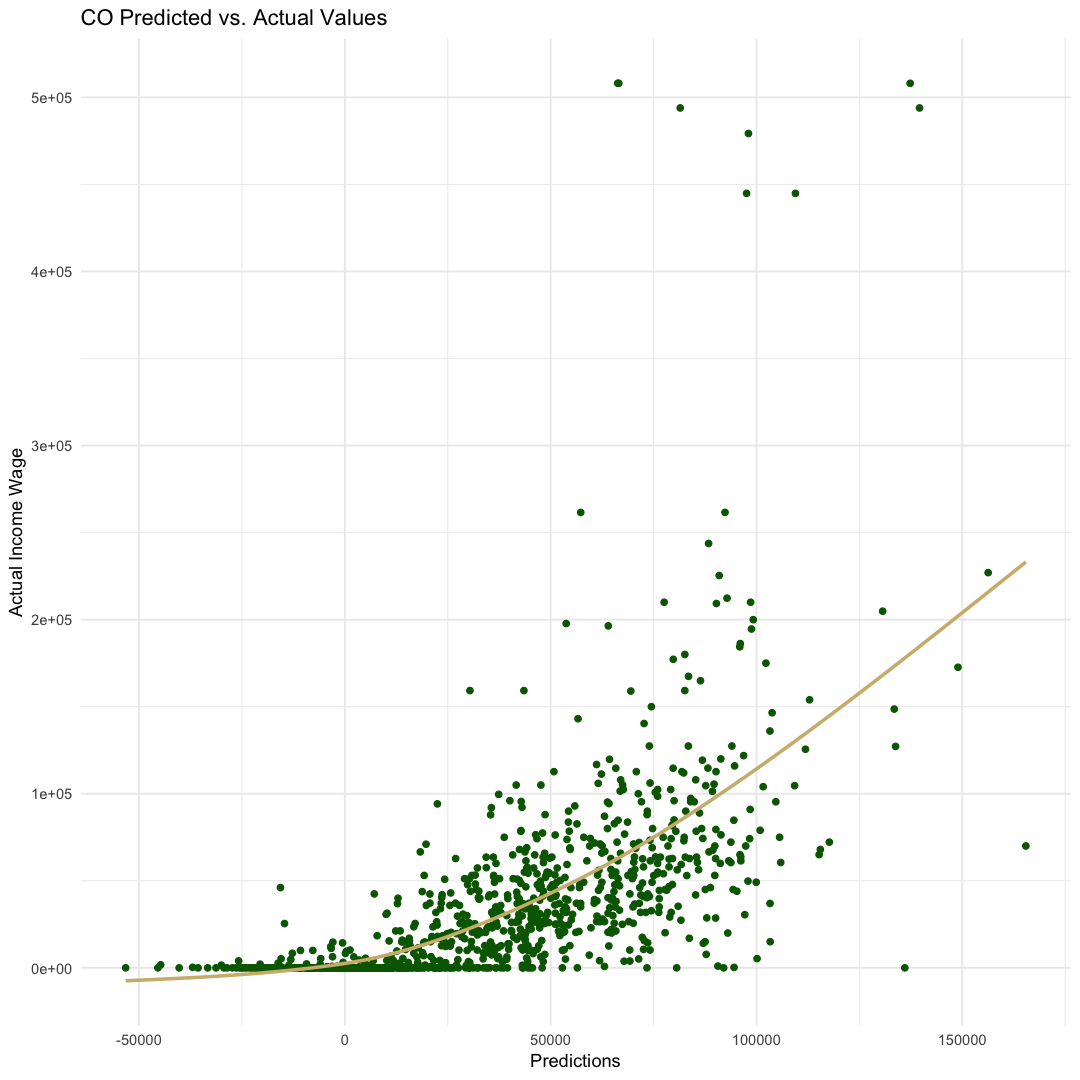

In [68]:
set.seed(00000)
n = nrow(mn)
split = floor(0.004671 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

tinyTest = mn[sample_set, ]


lmod = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, tinyTest)
 
ggplot(tinyTest, aes(x = predict(lmod, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark blue") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='MN Predicted vs. Actual Values') + 
    theme_minimal()

set.seed(00000)
n = nrow(co)
split = floor(0.004671 * n)

sample_set = sample.int(n, size = split, replace = FALSE)

tinyTest = co[sample_set, ]


lmod = lm(INCWAGE ~ SEX + AGE + MARRNO + EDUC + 
             CLASSWKR + UHRSWORK + OCCSCORE + DIFFSENS + RACE, tinyTest)
 
ggplot(tinyTest, aes(x = predict(lmod, type = 'response'), y = INCWAGE )) + 
    geom_point(col = "dark green") + 
    geom_smooth(se = F, col = "#CFB87C") +
    labs(x = 'Predictions', y= 'Actual Income Wage',title='CO Predicted vs. Actual Values') + 
    theme_minimal()